In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
import os
from spotipy.oauth2 import SpotifyClientCredentials
from fuzzywuzzy import fuzz
import dotenv

# load environment variables
dotenv.load_dotenv()

# constants
data_path = '../../raw_data/'

# Get credentials from environment variables
client_id = os.getenv('SPOTIFY_CLIENT_ID')
client_secret = os.getenv('SPOTIFY_CLIENT_SECRET')

C:\Users\Camille\anaconda3\envs\music-insights\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


ModuleNotFoundError: No module named 'dotenv'

### Attempt 1: Using Spotify API to get album name

In [2]:
songs_with_attributes_and_lyrics = pd.read_csv(data_path + 'camille/songs_with_attributes_and_lyrics.csv', nrows=10000)
# songs_with_lyrics_and_timestamps = pd.read_csv(data_path + 'camille/songs_with_lyrics_and_timestamps.csv')
songs_with_attributes_and_lyrics

id                 name  \
0     0Prct5TDjAnEgIqbxcldY9                    !   
1     2ASl4wirkeYm3OWZxXKYuq                   !!   
2     69lcggVPmOr9cvPx9kLiiN      !!! - Interlude   
3     4U7dlZjg1s9pjdppqZy0fm       !!De Repente!!   
4     4v1IBp3Y3rpkWmWzIlkYju       !!De Repente!!   
...                      ...                  ...   
9995  1sULdzB6vSo8XtJKNJG67w                 7.62   
9996  4xTx0HsUFdGoZzjziLfuG5                 7.62   
9997  62Yj1WX2JuGDKhslyN490y                 7.62   
9998  7w77k7yCaDOMe25fYxnzit             7.62 God   
9999  0hQeRKoNpPrR9doHP8GUPt  7.62's - Radio Edit   

                                  album_name  \
0                                 UNDEN!ABLE   
1                                        NaN   
2                          Where I Belong EP   
3     Un Palo Al Agua (20 Grandes Canciones)   
4                             Fuera De Lugar   
...                                      ...   
9995                                 HIStory   
9996                           Cycle of Zero   
9997                     HIStory, Lost Pages   
9998                                     NaN   
9999                     7.62's (Radio Edit)   

                                artists  danceability  energy key  loudness  \
0                          ['HELLYEAH']         0.415  0.6050   7   -11.157   
1                               Yxngxr1         0.788  0.6480   7    -9.135   
2                            ['Glowie']         0.000  0.0354   7   -20.151   
3                           ['Rosendo']         0.657  0.8820   5    -6.340   
4                           ['Rosendo']         0.659  0.8930   5    -8.531   
...                                 ...           ...     ...  ..       ...   
9995                      ['YFN Lucci']         0.769  0.6670   2    -6.562   
9996                       ['Divercia']         0.250  0.8890   4    -7.235   
9997                      ['YFN Lucci']         0.769  0.6670   2    -6.562   
9998                       Pooh Shiesty         0.819  0.6510  10    -5.859   
9999  ['Alabama Nick', 'Chefboy Tyree']         0.772  0.6810   9    -8.242   

     mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0       1       0.0575       0.00116          0.838000    0.4710    0.193   
1       0       0.3150       0.90000          0.000000    0.1760    0.287   
2       0       0.0000       0.90800          0.000000    0.4790    0.000   
3       1       0.0385       0.00740          0.000013    0.0474    0.939   
4       1       0.0411       0.09220          0.000019    0.0534    0.951   
...   ...          ...           ...               ...       ...      ...   
9995    1       0.5210       0.12800          0.000000    0.1100    0.329   
9996    0       0.0585       0.00434          0.848000    0.1270    0.159   
9997    1       0.5210       0.12800          0.000000    0.1100    0.329   
9998    0       0.2910       0.00861          0.000000    0.3780    0.522   
9999    1       0.0922       0.02040          0.014400    0.1090    0.131   

        tempo  duration_ms                                             lyrics  
0     100.059      79500.0  He said he came from Jamaica,\n he owned a cou...  
1      79.998     114000.0  Fucked a bitch, now she running with my kids\n...  
2       0.000      11413.0                     Oh, my God, I'm going crazy\n   
3     123.588     198173.0  Continuamente se extraña la gente si no puede ...  
4     123.600     199827.0  Continuamente se extraña la gente si no puede ...  
...       ...          ...                                                ...  
9995  158.059     172449.0  Pipe that shit up TnT\n Dmac on the fuckin' tr...  
9996  115.976     292107.0  (Seven... Sixty-two...)\n "Escaping reality as...  
9997  158.059     172449.0  Pipe that shit up TnT\n Dmac on the fuckin' tr...  
9998   77.013     177110.0  Once again I'm locked in with TP\n We finna ma...  
9999  143.008     174672.0  7.62's boy don't f--k round ge

In [3]:
def find_song_album(song_name, artist_name):
    """
    Finds the best matching song and album for a given song name and artist name using Spotify's API.

    Parameters:
    - song_name (str): The name of the song to search for.
    - artist_name (str): The name of the artist to search for.
    - client_id (str): Spotify API client ID.
    - client_secret (str): Spotify API client secret.

    Returns:
    - dict: A dictionary containing the best match's song name, artist name, album name, release date, and match score.
    - None: If no match is found with a score above the threshold.
    """
    
    # Initialize Spotify client with provided credentials
    client_credentials_manager = SpotifyClientCredentials(
        client_id=client_id,
        client_secret=client_secret
    )
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    
    # Construct the search query for Spotify API
    query = f"track:{song_name} artist:{artist_name}"
    # Perform the search with a limit of 50 results
    results = sp.search(q=query, type='track', limit=50)
    
    best_match = None
    highest_score = 0
    
    # Iterate over each track in the search results
    for track in results['tracks']['items']:
        # Calculate the similarity score for the song name
        song_score = fuzz.ratio(song_name.lower(), track['name'].lower())
        # Calculate the similarity score for the artist name
        artist_score = fuzz.ratio(artist_name.lower(), track['artists'][0]['name'].lower())
        
        # Calculate a combined score with weighted contributions from song and artist scores
        combined_score = (song_score * 0.6) + (artist_score * 0.4)
        
        # Update the best match if the current track has a higher combined score
        if combined_score > highest_score:
            highest_score = combined_score
            best_match = track
    
    # Check if a suitable match was found with a score above the threshold
    if best_match and highest_score > 70:  # Threshold for considering a match
        return {
            'song': best_match['name'],
            'artist': best_match['artists'][0]['name'],
            'album': best_match['album']['name'],
            'release_date': best_match['album']['release_date'],
            'match_score': highest_score
        }
    else:
        # Return None if no match meets the threshold criteria
        return None

In [4]:
import warnings
from tqdm import tqdm

# List to store indices of rows that were skipped
skipped_indices = []

# Making the artists column a list
import ast

def parse_artists(artists):
    if isinstance(artists, str):
        try:
            # Attempt to parse the string as a list
            parsed_artists = ast.literal_eval(artists)
            if isinstance(parsed_artists, list):
                return parsed_artists
        except (ValueError, SyntaxError):
            pass
    return [artists]

songs_with_attributes_and_lyrics['artists'] = songs_with_attributes_and_lyrics['artists'].apply(parse_artists)

# Function to apply to each row
def fill_album_name(row):
    if pd.isna(row['album_name']):
        try:
            result = None
            for artist in row['artists']:
                result = find_song_album(row['name'], artist)
                if result:
                    break
            if result:
                return result['album']
        except Exception as e:
            warnings.warn(f"Skipping row at index {row.name} due to error: {e}")
            skipped_indices.append(row.name)
    return row['album_name']

songs_with_attributes_and_lyrics_cleaned = songs_with_attributes_and_lyrics.copy()

# Apply the function to the DataFrame with tqdm progress bar
tqdm.pandas()
songs_with_attributes_and_lyrics_cleaned['album_name'] = songs_with_attributes_and_lyrics_cleaned.progress_apply(fill_album_name, axis=1)

songs_with_attributes_and_lyrics_cleaned.head()

  0%|          | 0/10000 [00:00<?, ?it/s]/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_48515/1708121439.py:35: UserWarning: Skipping row at index 1 due to error: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.
  warnings.warn(f"Skipping row at index {row.name} due to error: {e}")
/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_48515/1708121439.py:35: UserWarning: Skipping row at index 5 due to error: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.
  warnings.warn(f"Skipping row at index {row.name} due to error: {e}")
/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_48515/1708121439.py:35: UserWarning: Skipping row at index 7 due to error: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.
  warnings.warn(f"Skipping row at index {row.name} due to error: {e}")
/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_48515/1708121439.py:35: UserWarning: Skipping row at index 8 due to erro

id             name  \
0  0Prct5TDjAnEgIqbxcldY9                !   
1  2ASl4wirkeYm3OWZxXKYuq               !!   
2  69lcggVPmOr9cvPx9kLiiN  !!! - Interlude   
3  4U7dlZjg1s9pjdppqZy0fm   !!De Repente!!   
4  4v1IBp3Y3rpkWmWzIlkYju   !!De Repente!!   

                               album_name     artists  danceability  energy  \
0                              UNDEN!ABLE  [HELLYEAH]         0.415  0.6050   
1                                     NaN   [Yxngxr1]         0.788  0.6480   
2                       Where I Belong EP    [Glowie]         0.000  0.0354   
3  Un Palo Al Agua (20 Grandes Canciones)   [Rosendo]         0.657  0.8820   
4                          Fuera De Lugar   [Rosendo]         0.659  0.8930   

  key  loudness mode  speechiness  acousticness  instrumentalness  liveness  \
0   7   -11.157    1       0.0575       0.00116          0.838000    0.4710   
1   7    -9.135    0       0.3150       0.90000          0.000000    0.1760   
2   7   -20.151    0       0.0000       0.90800          0.000000    0.4790   
3   5    -6.340    1       0.0385       0.00740          0.000013    0.0474   
4   5    -8.531    1       0.0411       0.09220          0.000019    0.0534   

   valence    tempo  duration_ms  \
0    0.193  100.059      79500.0   
1    0.287   79.998     114000.0   
2    0.000    0.000      11413.0   
3    0.939  123.588     198173.0   
4    0.951  123.600     199827.0   

                                              lyrics  
0  He said he came from Jamaica,\n he owned a cou...  
1  Fucked a bitch, now she running with my kids\n...  
2                     Oh, my God, I'm going crazy\n   
3  Continuamente se extraña la gente si no puede ...  
4  Continuamente se extraña la gente si no puede ...

In [5]:
len(skipped_indices)

5930

In [6]:
songs_with_attributes_and_lyrics_cleaned.tail()

id                 name           album_name  \
9995  1sULdzB6vSo8XtJKNJG67w                 7.62              HIStory   
9996  4xTx0HsUFdGoZzjziLfuG5                 7.62        Cycle of Zero   
9997  62Yj1WX2JuGDKhslyN490y                 7.62  HIStory, Lost Pages   
9998  7w77k7yCaDOMe25fYxnzit             7.62 God                  NaN   
9999  0hQeRKoNpPrR9doHP8GUPt  7.62's - Radio Edit  7.62's (Radio Edit)   

                            artists  danceability  energy key  loudness mode  \
9995                    [YFN Lucci]         0.769   0.667   2    -6.562    1   
9996                     [Divercia]         0.250   0.889   4    -7.235    0   
9997                    [YFN Lucci]         0.769   0.667   2    -6.562    1   
9998                 [Pooh Shiesty]         0.819   0.651  10    -5.859    0   
9999  [Alabama Nick, Chefboy Tyree]         0.772   0.681   9    -8.242    1   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
9995       0.5210       0.12800            0.0000     0.110    0.329  158.059   
9996       0.0585       0.00434            0.8480     0.127    0.159  115.976   
9997       0.5210       0.12800            0.0000     0.110    0.329  158.059   
9998       0.2910       0.00861            0.0000     0.378    0.522   77.013   
9999       0.0922       0.02040            0.0144     0.109    0.131  143.008   

      duration_ms                                             lyrics  
9995     172449.0  Pipe that shit up TnT\n Dmac on the fuckin' tr...  
9996     292107.0  (Seven... Sixty-two...)\n "Escaping reality as...  
9997     172449.0  Pipe that shit up TnT\n Dmac on the fuckin' tr...  
9998     177110.0  Once again I'm locked in with TP\n We finna ma...  
9999     174672.0  7.62's boy don't f--k round get bruised\n 7.62...

In [7]:
songs_with_attributes_and_lyrics_cleaned.iloc[0]['artists'][0]


'HELLYEAH'

## Using top spotify songs csv file

In [8]:
top_spotify_songs = pd.read_csv(data_path + 'camille/top_spotify_songs.csv')
top_spotify_songs

songs         artists  \
0                                      1-800-OŚWIECENIE  Taco Hemingway   
1                                        Like Ice Spice       Blaqbonez   
2                             AMBIENTE ERRADO - Ao Vivo    Luan Santana   
3                                          Mexri Telous  Nino Xypolitas   
4                                                 Tsiou     Dirty Harry   
...                                                 ...             ...   
7472  Wonderful Christmastime - Edited Version / Rem...  Paul McCartney   
7473              I Wish It Could Be Christmas Everyday         Wizzard   
7474                                 Carol of the Bells   John Williams   
7475        Winter Wonderland - Spotify Singles Holiday          Laufey   
7476                    All I Want for Christmas Is You    Mariah Carey   

      daily_rank  daily_movement  weekly_movement country snapshot_date  \
0             47               0                3      PL    2023-10-19   
1             47               0                3      NG    2023-10-19   
2             46               0                4      BR    2023-10-19   
3             41               0                9      GR    2023-10-19   
4             38               0               12      GR    2023-10-19   
...          ...             ...              ...     ...           ...   
7472          25              25               25      GB    2024-12-09   
7473          24              26               26      GB    2024-12-09   
7474          23              27               27      GB    2024-12-09   
7475          31              19               19      GB    2024-12-09   
7476           3              47               47     NaN    2024-12-09   

      song_popularity                                       album_name  \
0                  71                                 1-800-OŚWIECENIE   
1                  66                           Like Ice Spice / Bezos   
2                  67                           LUAN CITY 2.0 - FASE 2   
3                  52                                     Mexri Telous   
4                  40                                            Tsiou   
...               ...                                              ...   
7472               83                   McCartney II (Special Edition)   
7473               74            I Wish It Could Be Christmas Everyday   
7474               84  Home Alone (Original Motion Picture Soundtrack)   
7475               82                          Spotify Singles Holiday   
7476               93                                  Merry Christmas   

     album_release_date  ...  speechiness  acousticness  instrumentalness  \
0            2023-09-21  ...       0.2910       0.26800          0.000000   
1            2023-07-07  ...       0.2970       0.12600          0.000000   
2            2023-09-14  ...       0.0378       0.03680          0.000000   
3            2023-10-13  ...       0.1450       0.18100          0.000011   
4            2023-10-16  ...       0.3450       0.53000          0.000000   
...                 ...  ...          ...           ...               ...   
7472         1980-05-16  ...       0.0324       0.32200          0.000000   
7473         2007-11-19  ...       0.0515       0.00422          0.000014   
7474         1990-01-01  ...       0.0448       0.99400          0.029200   
7475         2023-11-14  ...       0.0370       0.83900          0.000000   
7476         1994-10-28  ...       0.0384       0.16400          0.000000   

      liveness  valence    tempo  followers  artist_popularity  \
0       0.2660    0.868  135.040  1272680.0                 67   
1       0.2310    0.804  178.943   135916.0                 44   
2       0.3410    0.452  119.894  6429598.0                 76   
3       0.1660    0.581  139.987    46842.0                 38   
4       0.1130    0.612  124.017    25091.0                 50   
...        ...      ...      ...      

In [9]:
top_spotify_songs.columns

Index(['songs', 'artists', 'daily_rank', 'daily_movement', 'weekly_movement',
       'country', 'snapshot_date', 'song_popularity', 'album_name',
       'album_release_date', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'followers', 'artist_popularity', 'genres',
       'chart_hits'],
      dtype='object')

<Figure size 1500x1000 with 0 Axes>

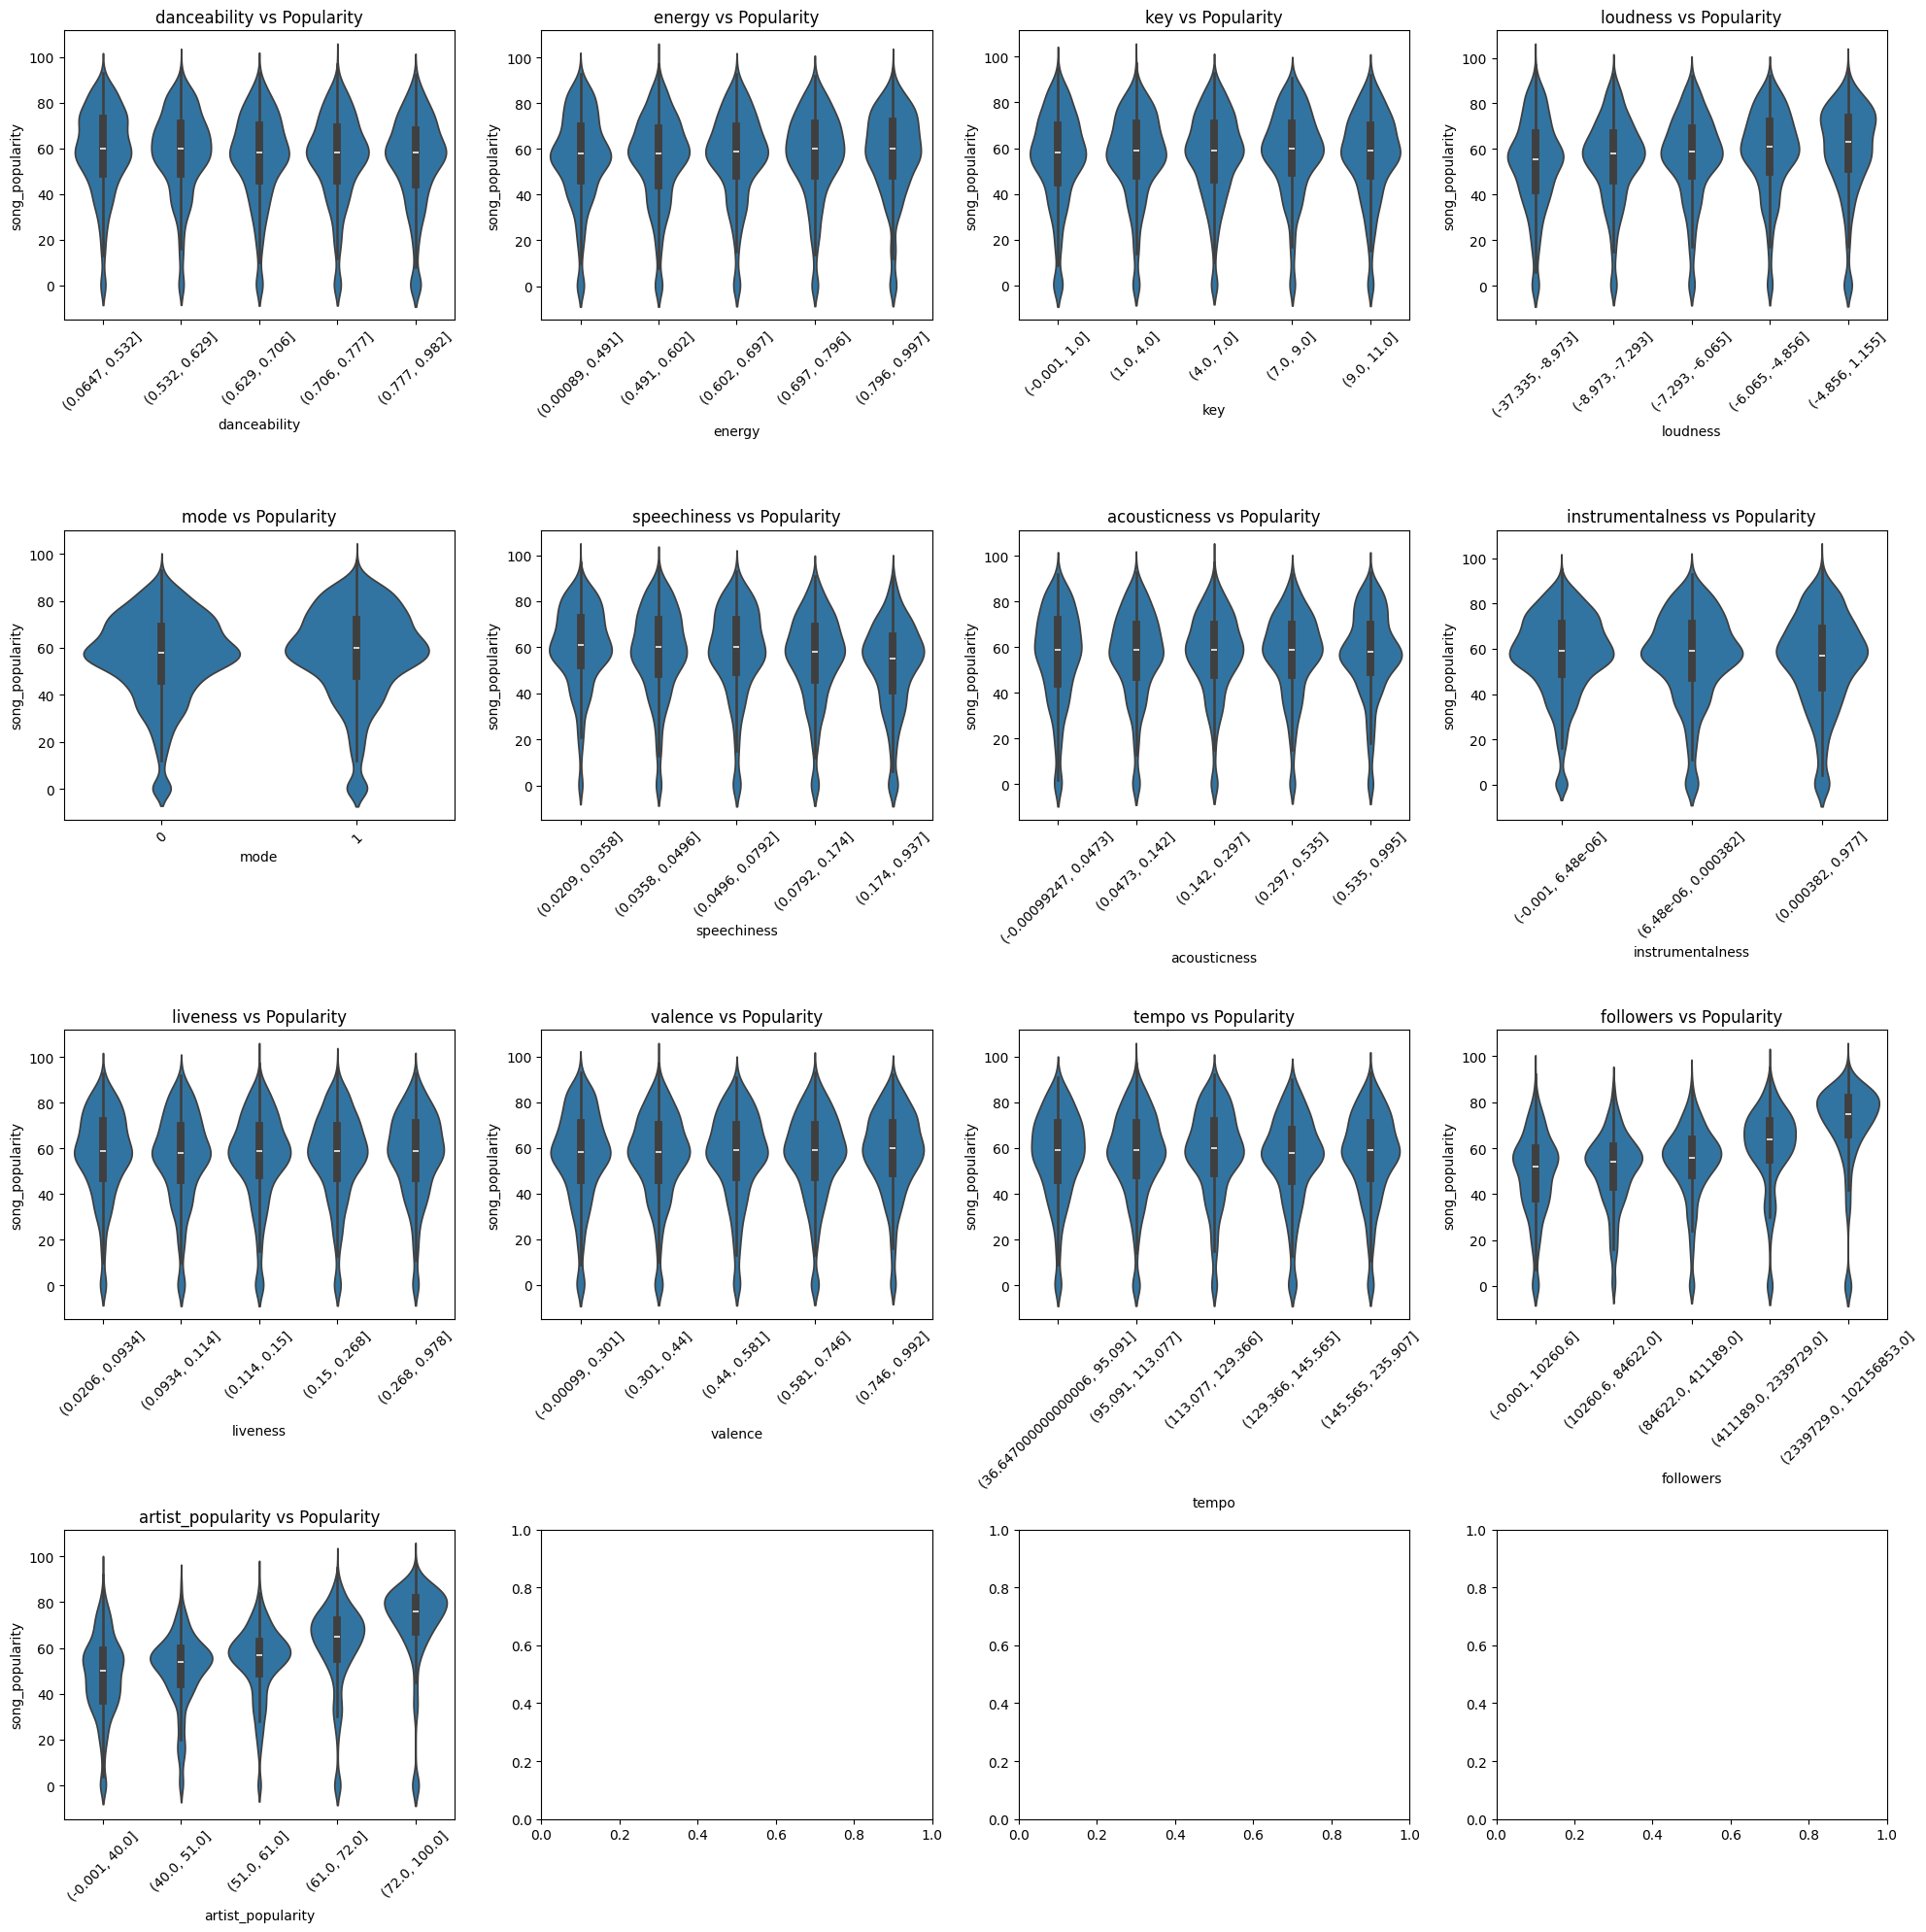

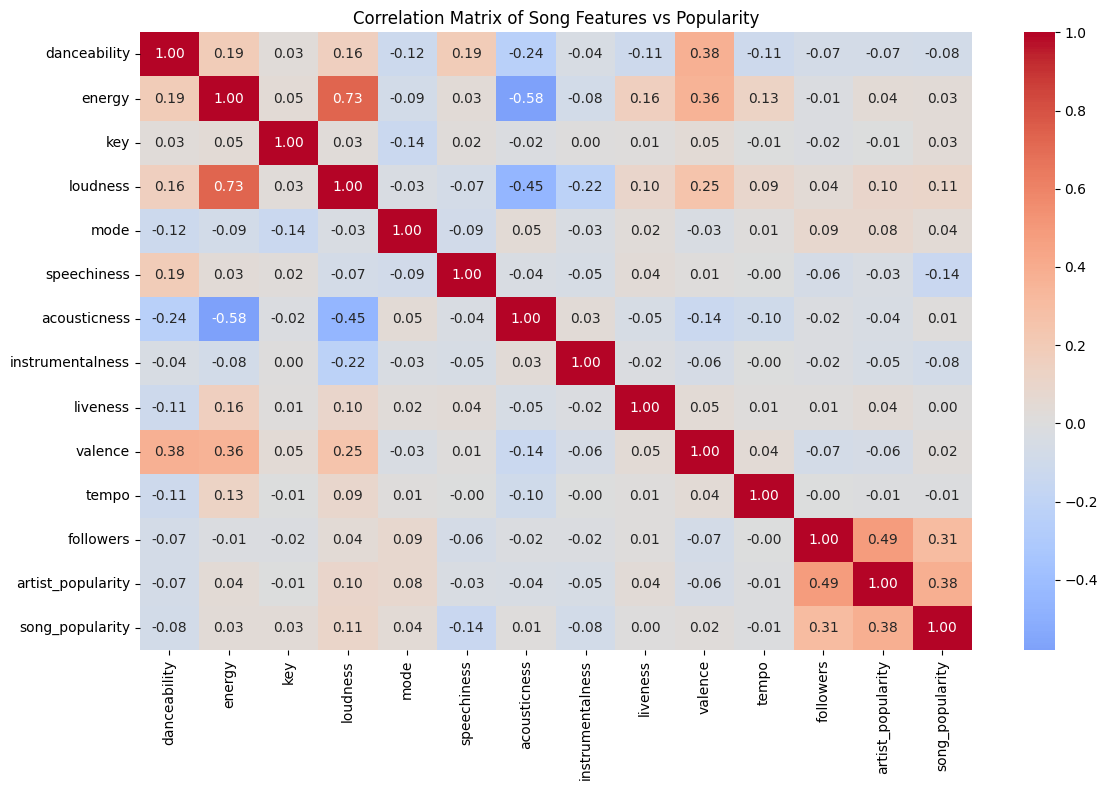

In [10]:

# Create a figure for violin plots
plt.figure(figsize=(15, 10))

# Create violin plots for each numerical feature vs song popularity
feature_columns = [
    'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'followers', 'artist_popularity'
]

# Create subplots for violin plots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.ravel()  # Flatten the array of axes

for idx, feature in enumerate(feature_columns):
    if idx < len(feature_columns):
        if feature == 'mode':
            sns.violinplot(data=top_spotify_songs, y='song_popularity', x=top_spotify_songs[feature].astype('category'), ax=axes[idx])
        else:
            sns.violinplot(data=top_spotify_songs, y='song_popularity', x=pd.qcut(top_spotify_songs[feature], q=5, duplicates='drop'), ax=axes[idx])
        axes[idx].set_title(f'{feature} vs Popularity')
        axes[idx].set_xlabel(feature)
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Create correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = top_spotify_songs[feature_columns + ['song_popularity']].corr()

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f')  # Format correlation values to 2 decimal places

plt.title('Correlation Matrix of Song Features vs Popularity')
plt.tight_layout()
plt.show()

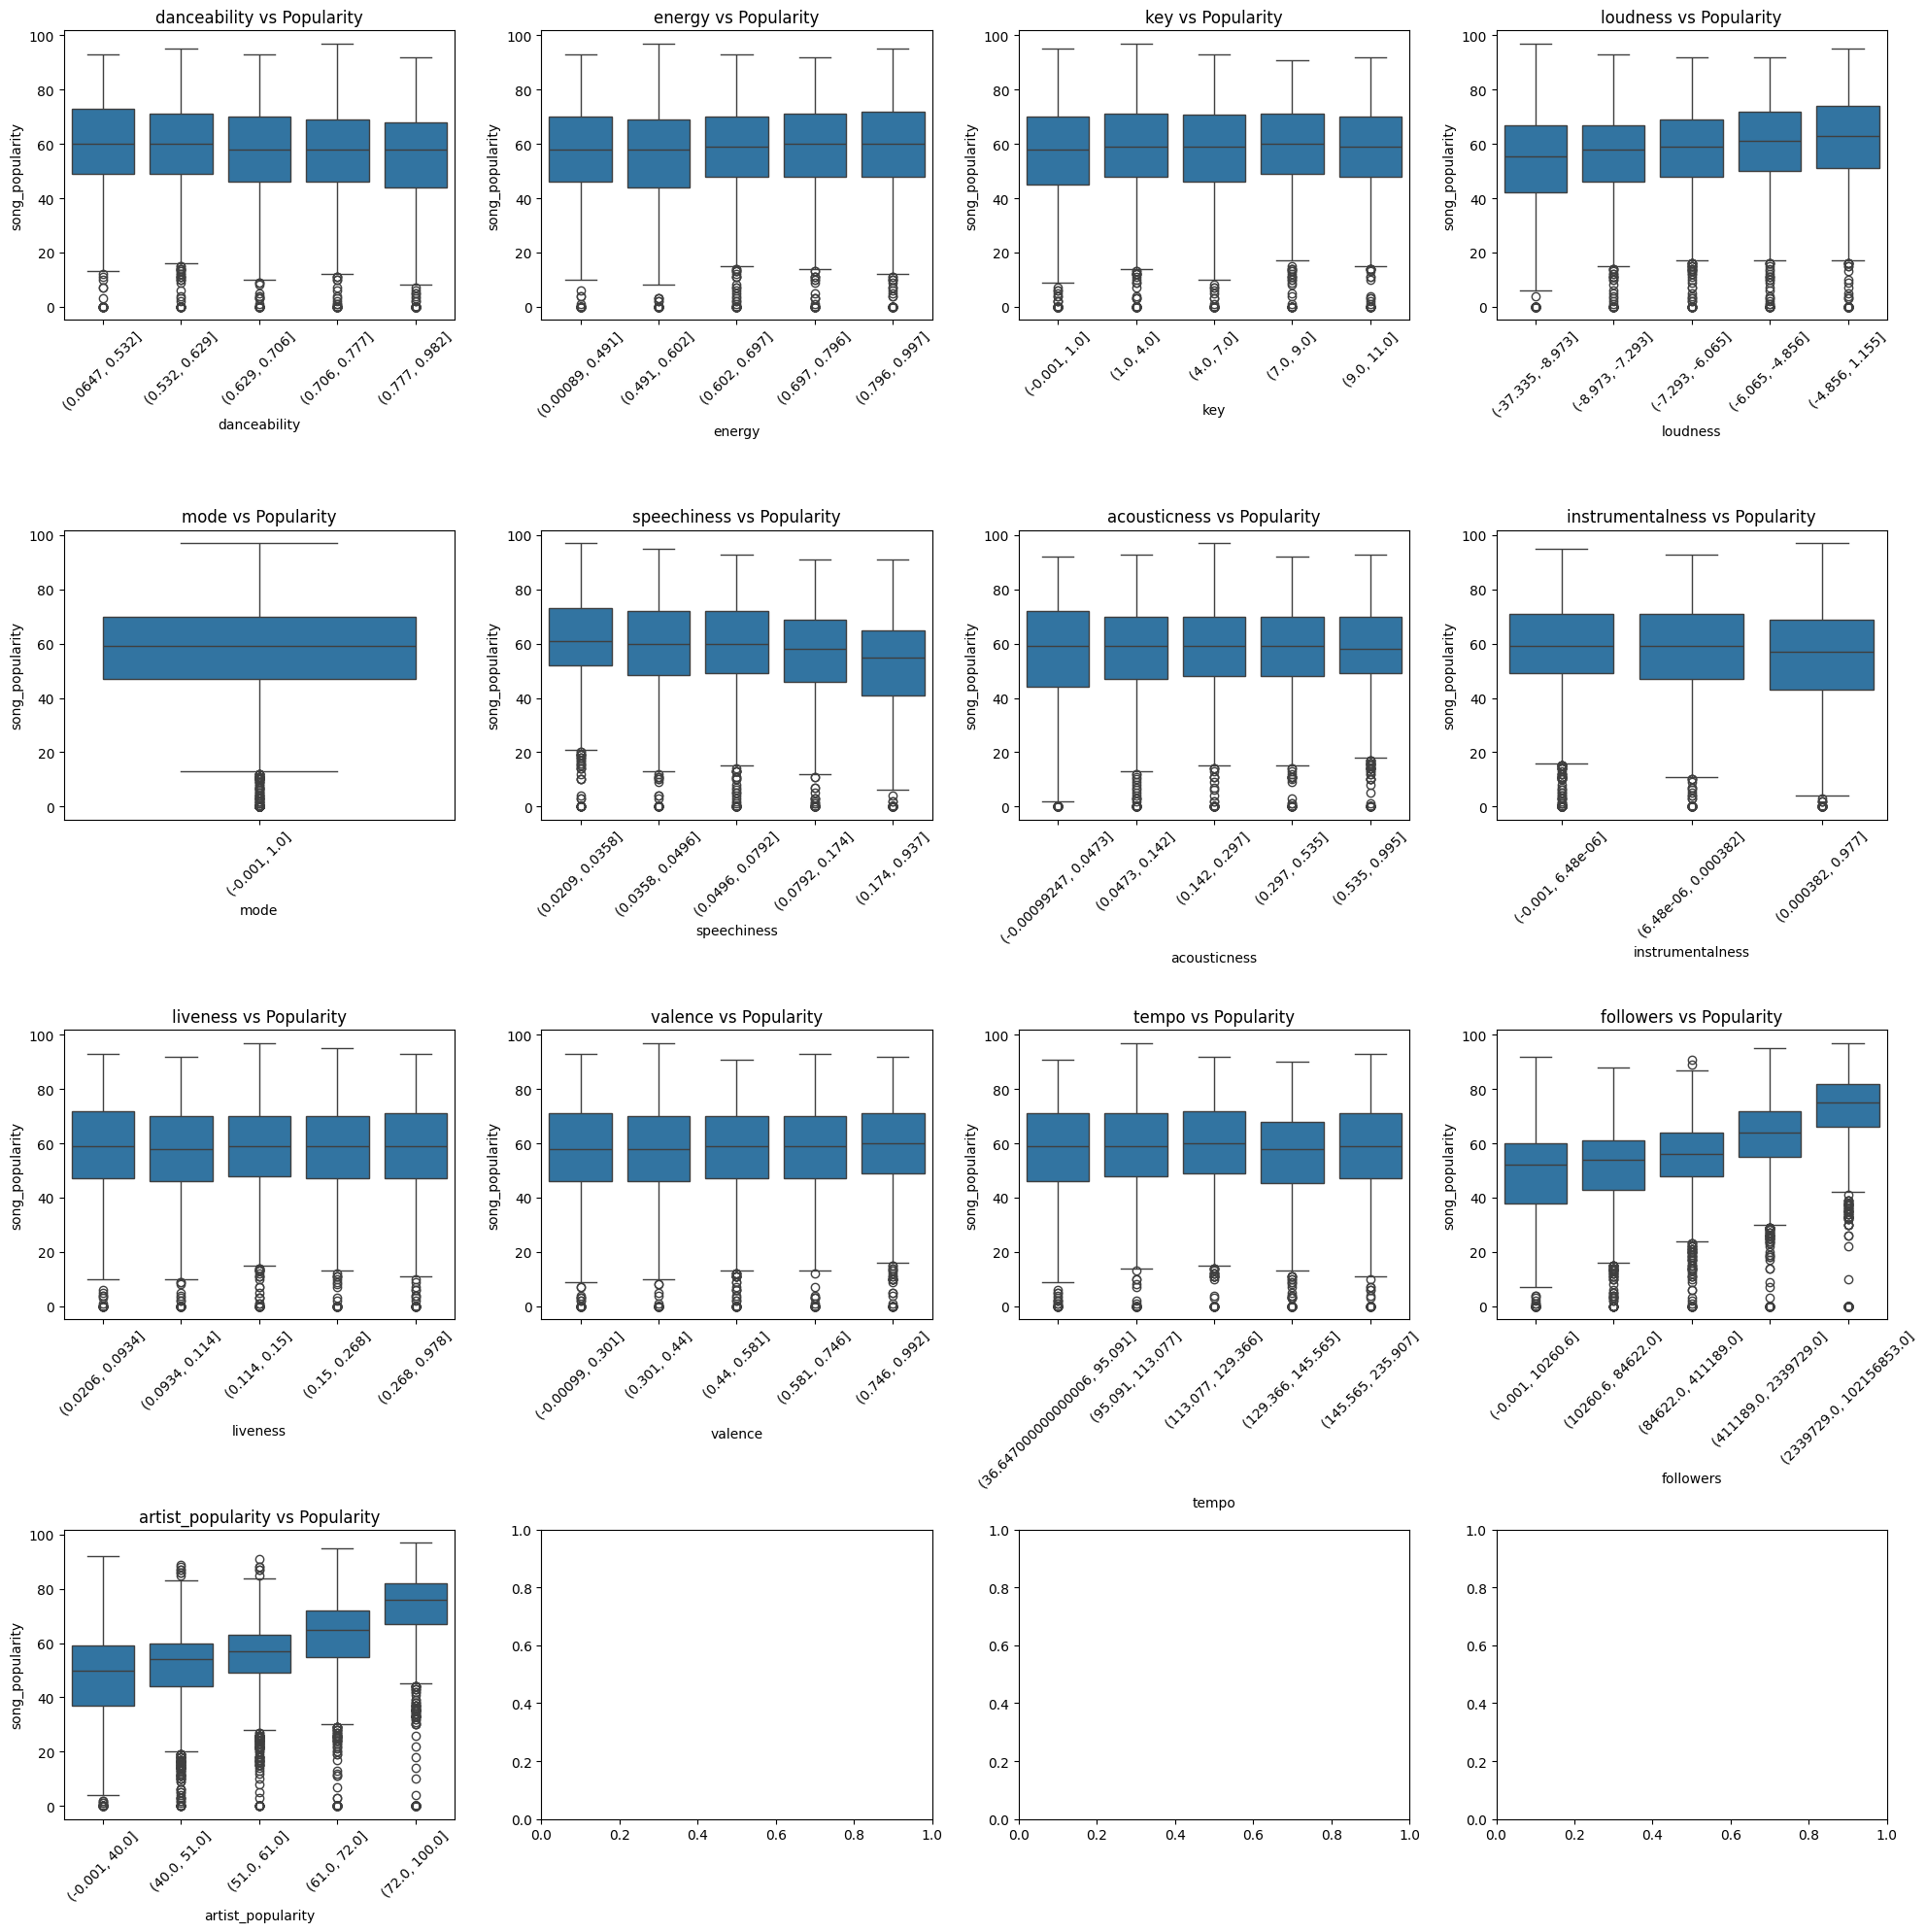

In [11]:
# Create subplots for box plots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.ravel()  # Flatten the array of axes

for idx, feature in enumerate(feature_columns):
    if idx < len(feature_columns):
        # Create bins for numerical data using qcut (quantile-based discretization)
        sns.boxplot(data=top_spotify_songs, 
                   y='song_popularity', 
                   x=pd.qcut(top_spotify_songs[feature], q=5, duplicates='drop'), 
                   ax=axes[idx])
        axes[idx].set_title(f'{feature} vs Popularity')
        axes[idx].set_xlabel(feature)
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## What features have been popular over time

/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_48515/4021421425.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = popular_songs.groupby(['month', f'{feature}_category']).size().unstack(fill_value=0)


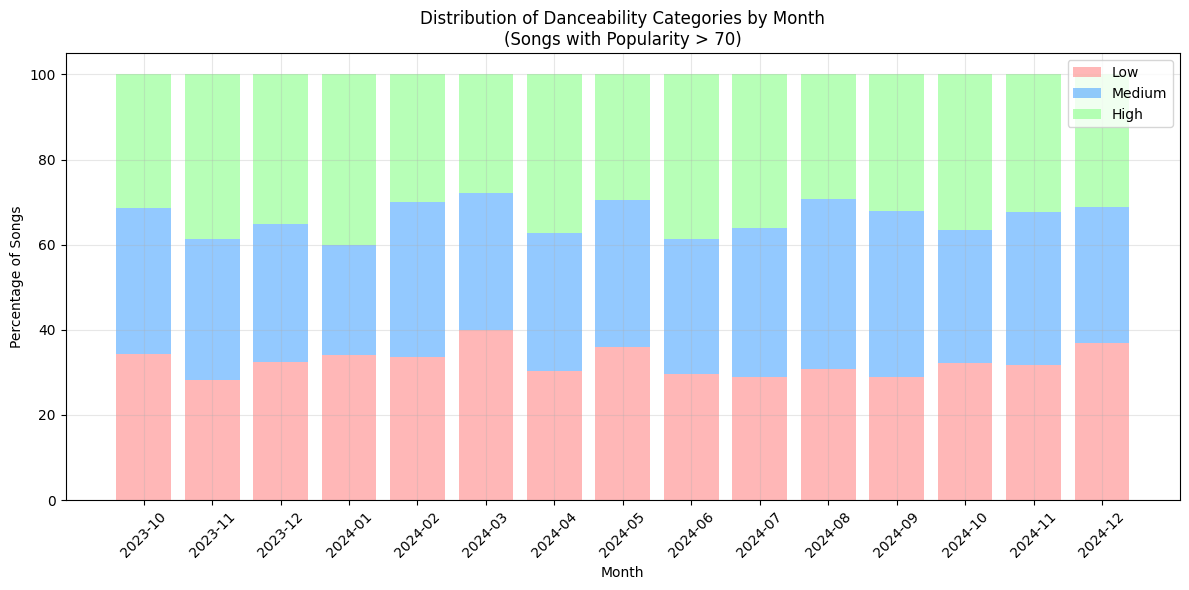

/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_48515/4021421425.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = popular_songs.groupby(['month', f'{feature}_category']).size().unstack(fill_value=0)


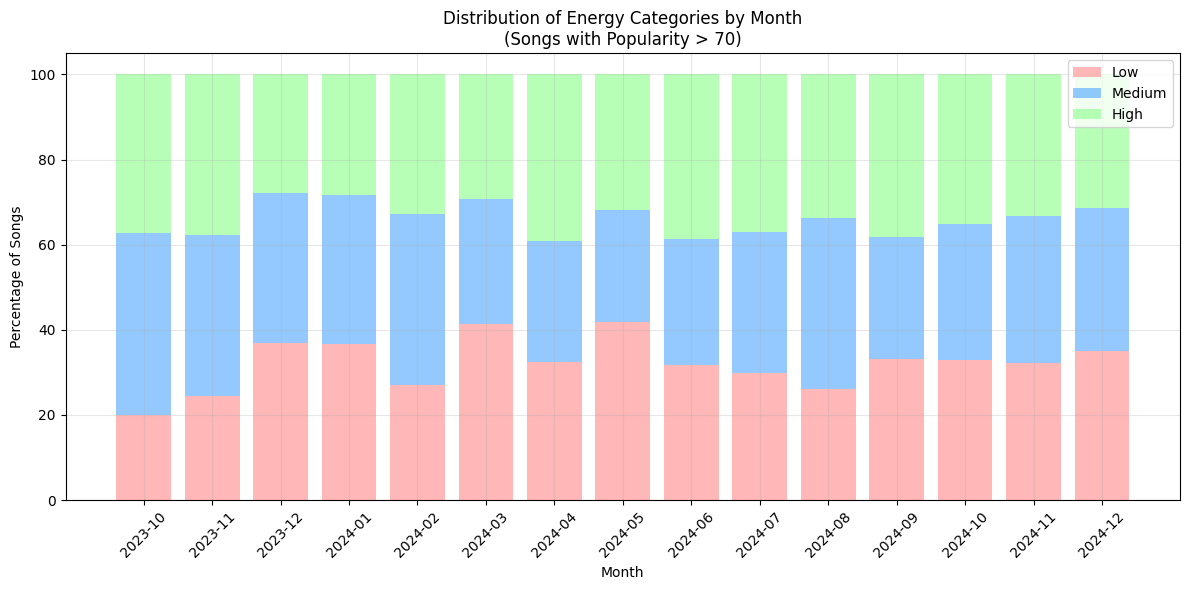

/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_48515/4021421425.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = popular_songs.groupby(['month', f'{feature}_category']).size().unstack(fill_value=0)


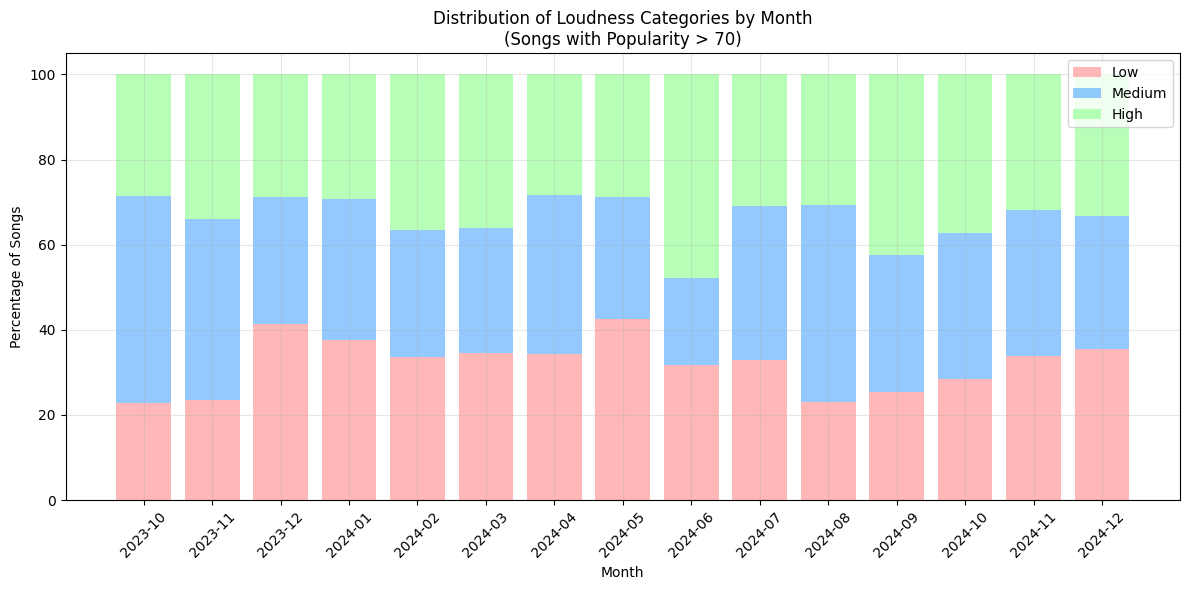

/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_48515/4021421425.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = popular_songs.groupby(['month', f'{feature}_category']).size().unstack(fill_value=0)


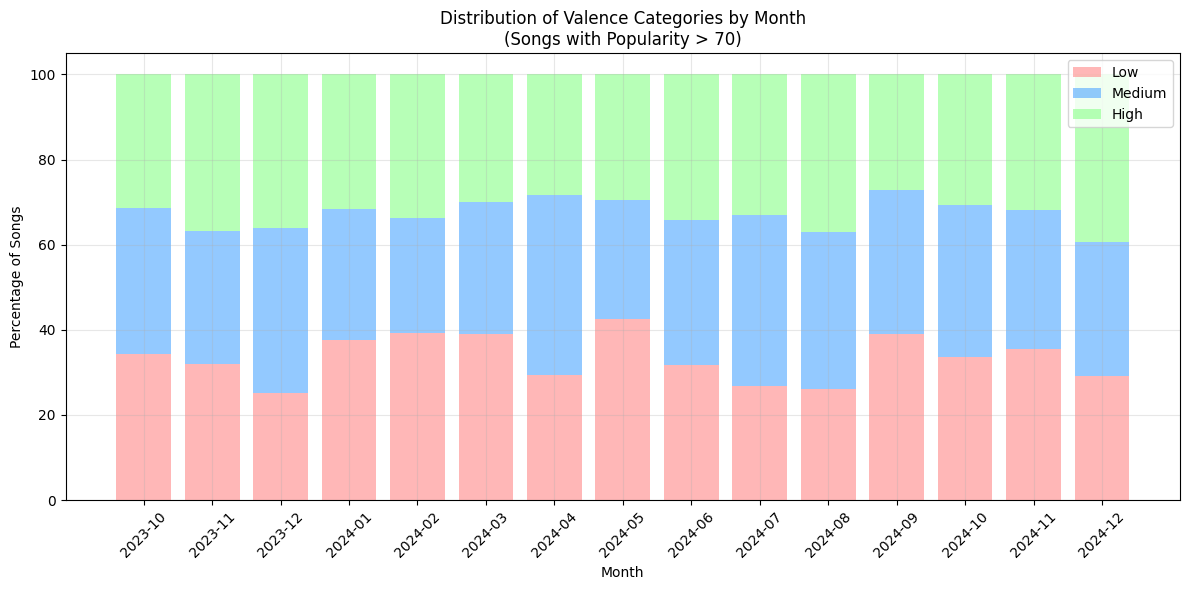

/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_48515/4021421425.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = popular_songs.groupby(['month', f'{feature}_category']).size().unstack(fill_value=0)


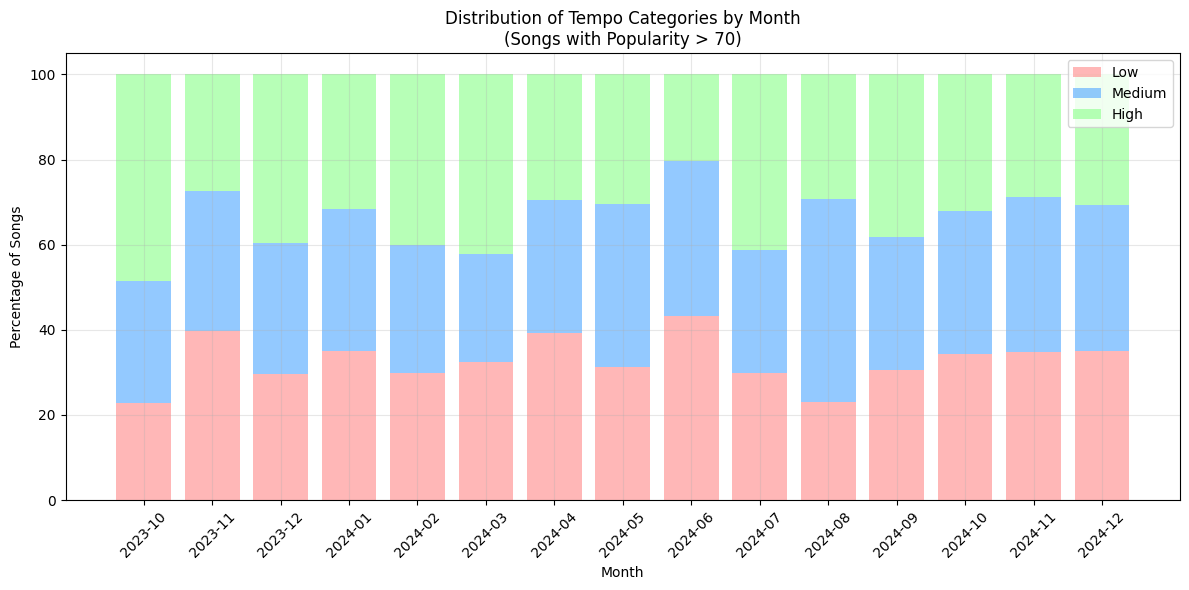

/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_48515/4021421425.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = popular_songs.groupby(['month', f'{feature}_category']).size().unstack(fill_value=0)


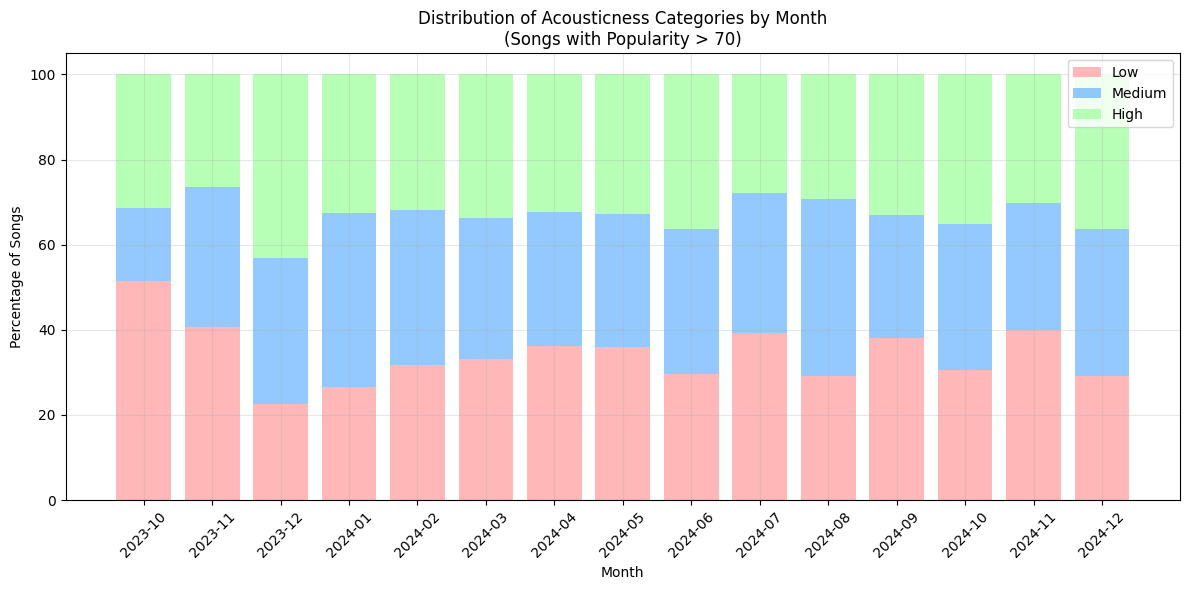

/var/folders/3s/m0cz_jjn4fqfdv71rvtl6bpr0000gn/T/ipykernel_48515/4021421425.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = popular_songs.groupby(['month', f'{feature}_category']).size().unstack(fill_value=0)


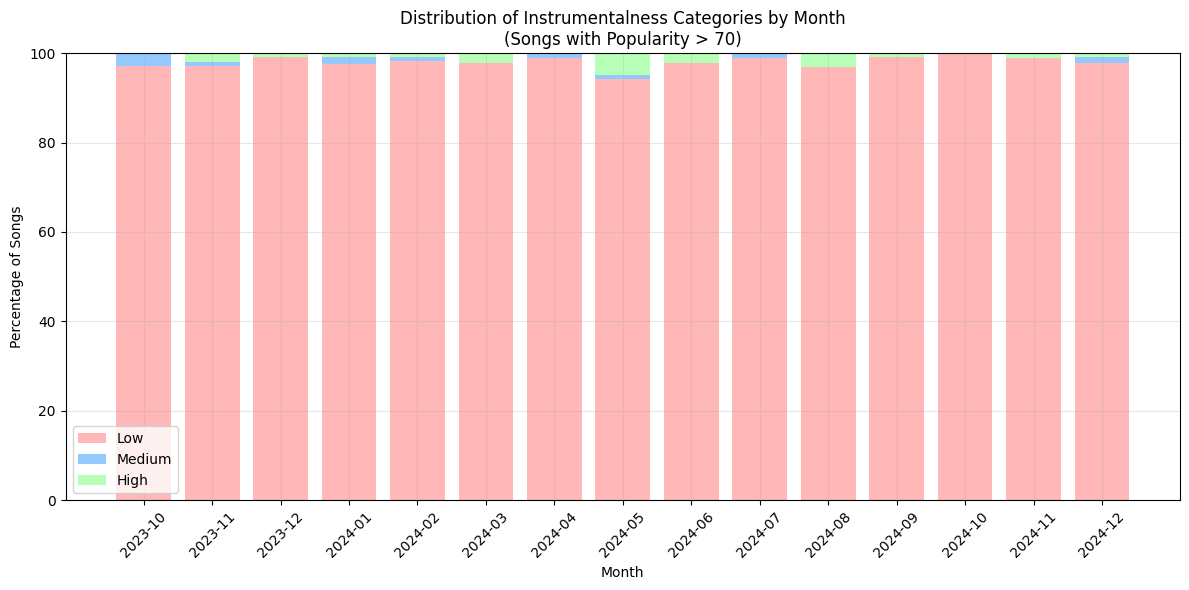


Summary of popular songs (popularity > 70):

Danceability distribution:
Medium: 33.4%
Low: 33.3%
High: 33.3%

Energy distribution:
Low: 33.4%
High: 33.3%
Medium: 33.3%

Loudness distribution:
High: 33.4%
Low: 33.3%
Medium: 33.3%

Valence distribution:
Low: 33.4%
High: 33.4%
Medium: 33.3%

Tempo distribution:
Low: 33.4%
Medium: 33.3%
High: 33.3%

Acousticness distribution:
Medium: 33.4%
Low: 33.3%
High: 33.3%

Instrumentalness distribution:
Low: 98.1%
High: 1.2%
Medium: 0.7%


In [12]:
# First, let's create a subset of popular songs (popularity > 70)
popularity_threshold = 70
popular_songs = top_spotify_songs[top_spotify_songs['song_popularity'] > popularity_threshold].copy()

# Convert snapshot_date to datetime and create a month column
popular_songs['snapshot_date'] = pd.to_datetime(popular_songs['snapshot_date'])
popular_songs['month'] = popular_songs['snapshot_date'].dt.to_period('M')

# Function to categorize features into low, medium, high
def categorize_feature(series):
    try:
        return pd.qcut(series, q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')
    except ValueError:
        # For features with many duplicate values, use regular cut instead
        return pd.cut(series, bins=3, labels=['Low', 'Medium', 'High'])

# Features to analyze
features_to_analyze = [
    'danceability', 'energy', 'loudness', 'valence', 
    'tempo', 'acousticness', 'instrumentalness'
]

# Create categories for each feature
for feature in features_to_analyze:
    popular_songs[f'{feature}_category'] = categorize_feature(popular_songs[feature])

# Group by month and calculate percentage of each category
def calculate_monthly_percentages(feature):
    monthly_counts = popular_songs.groupby(['month', f'{feature}_category']).size().unstack(fill_value=0)
    monthly_percentages = monthly_counts.div(monthly_counts.sum(axis=1), axis=0) * 100
    return monthly_percentages

# Plot trends for each feature
for feature in features_to_analyze:
    monthly_percentages = calculate_monthly_percentages(feature)
    
    plt.figure(figsize=(12, 6))
    
    # Create the bar plot
    bottom = np.zeros(len(monthly_percentages))
    colors = ['#ff9999', '#66b3ff', '#99ff99']  # Red, Blue, Green
    
    for idx, category in enumerate(['Low', 'Medium', 'High']):
        plt.bar(monthly_percentages.index.astype(str), monthly_percentages[category], 
               bottom=bottom, label=category, color=colors[idx], alpha=0.7)
        bottom += monthly_percentages[category]
    
    plt.title(f'Distribution of {feature.capitalize()} Categories by Month\n(Songs with Popularity > {popularity_threshold})')
    plt.xlabel('Month')
    plt.ylabel('Percentage of Songs')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Print summary statistics
print(f"\nSummary of popular songs (popularity > {popularity_threshold}):")
for feature in features_to_analyze:
    category_counts = popular_songs[f'{feature}_category'].value_counts(normalize=True) * 100
    print(f"\n{feature.capitalize()} distribution:")
    for category, percentage in category_counts.items():
        print(f"{category}: {percentage:.1f}%")

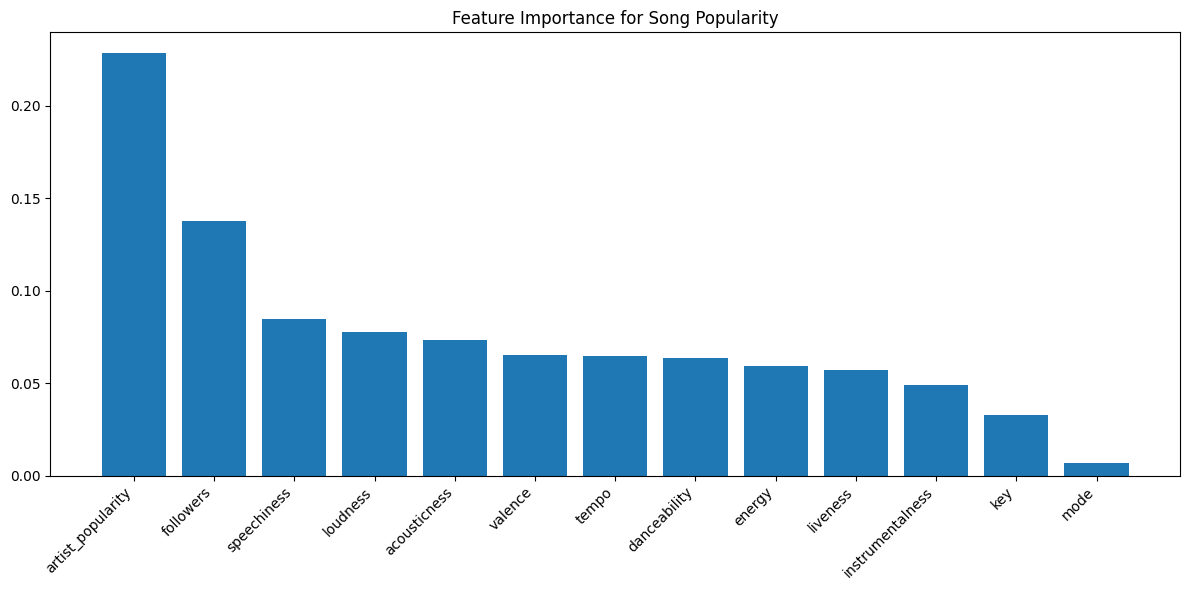


Feature Importances:
artist_popularity: 0.2284
followers: 0.1376
speechiness: 0.0846
loudness: 0.0776
acousticness: 0.0734
valence: 0.0653
tempo: 0.0649
danceability: 0.0637
energy: 0.0595
liveness: 0.0569
instrumentalness: 0.0488
key: 0.0326
mode: 0.0067


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the features
feature_columns = [
    'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'followers', 'artist_popularity'
]

X = top_spotify_songs[feature_columns]
y = top_spotify_songs['song_popularity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
})
importances = importances.sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(importances['feature'], importances['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance for Song Popularity')
plt.tight_layout()
plt.show()

# Print feature importances
print("\nFeature Importances:")
for idx, row in importances.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

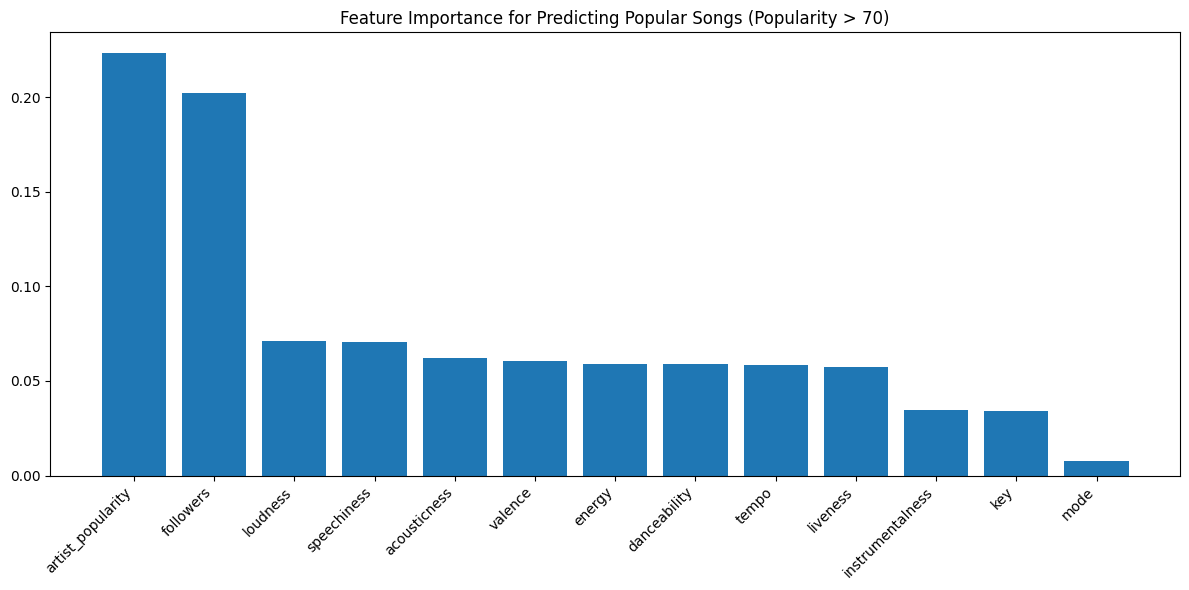


Feature Importances:
artist_popularity: 0.2231
followers: 0.2022
loudness: 0.0709
speechiness: 0.0708
acousticness: 0.0621
valence: 0.0605
energy: 0.0591
danceability: 0.0589
tempo: 0.0587
liveness: 0.0572
instrumentalness: 0.0347
key: 0.0340
mode: 0.0078

Model Performance:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1119
           1       0.74      0.54      0.62       377

    accuracy                           0.84      1496
   macro avg       0.80      0.74      0.76      1496
weighted avg       0.83      0.84      0.83      1496



In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the features
feature_columns = [
    'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'followers', 'artist_popularity'
]

# Create binary classification target (1 for popular songs, 0 for unpopular)
popularity_threshold = 70
X = top_spotify_songs[feature_columns]
y = (top_spotify_songs['song_popularity'] > popularity_threshold).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
})
importances = importances.sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(importances['feature'], importances['importance'])
plt.xticks(rotation=45, ha='right')
plt.title(f'Feature Importance for Predicting Popular Songs (Popularity > {popularity_threshold})')
plt.tight_layout()
plt.show()

# Print feature importances and model performance
print("\nFeature Importances:")
for idx, row in importances.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

# Print model performance metrics
from sklearn.metrics import classification_report
y_pred = rf_model.predict(X_test)
print("\nModel Performance:")
print(classification_report(y_test, y_pred))

## Valance means positive emotions, so are top artists more positive?

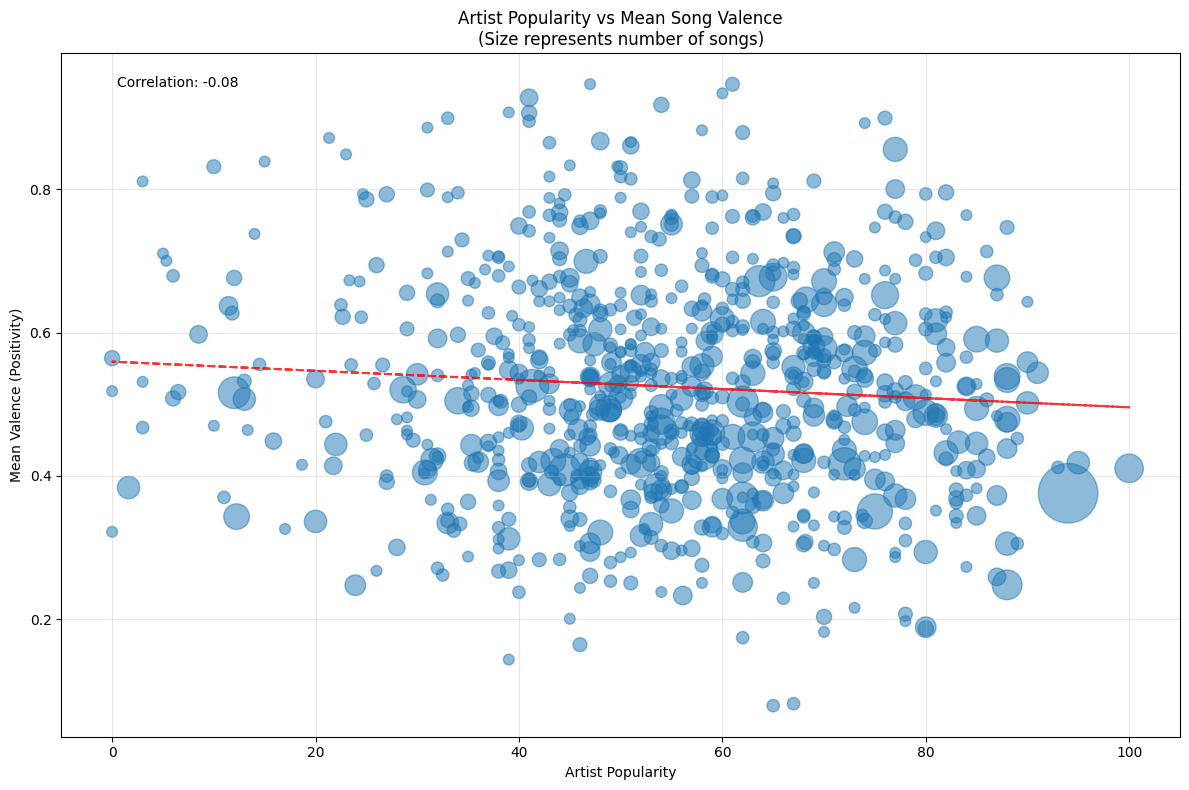


Top 10 Most Popular Artists and their Mean Valence:
            artists  artist_popularity  valence  songs
260       Bad Bunny              100.0    0.411     21
638           Drake               95.0    0.419     13
2204   Taylor Swift               94.0    0.376     92
2257     The Weeknd               93.0    0.412      4
252             BTS               91.0    0.544     12
663      Ed Sheeran               90.0    0.559     11
1150  Justin Bieber               90.0    0.643      3
716          Eminem               90.0    0.502     13
1840    Post Malone               89.0    0.452      4
1132     Juice WRLD               89.0    0.306      4

Top 10 Most Positive Artists (among popular ones):
                                artists  artist_popularity  valence  songs
114                      Alfredo Olivas               76.0    0.899      5
2400                     Wesley Safadão               74.0    0.892      3
218                            Aventura               77.0    0.8

In [15]:
# Group by artists and calculate mean valence and mean artist popularity
artist_analysis = top_spotify_songs.groupby('artists').agg({
    'valence': 'mean',
    'artist_popularity': 'mean',
    'songs': 'count'  # This will give us the number of songs per artist
}).reset_index()

# Let's filter for artists with at least a few songs to get more reliable means
min_songs = 3  # We can adjust this threshold
artist_analysis_filtered = artist_analysis[artist_analysis['songs'] >= min_songs]

# Create scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(artist_analysis_filtered['artist_popularity'], 
           artist_analysis_filtered['valence'],
           alpha=0.5,
           s=artist_analysis_filtered['songs']*20)  # Size of point represents number of songs

plt.xlabel('Artist Popularity')
plt.ylabel('Mean Valence (Positivity)')
plt.title('Artist Popularity vs Mean Song Valence\n(Size represents number of songs)')

# Add a trend line
z = np.polyfit(artist_analysis_filtered['artist_popularity'], 
               artist_analysis_filtered['valence'], 1)
p = np.poly1d(z)
plt.plot(artist_analysis_filtered['artist_popularity'], 
         p(artist_analysis_filtered['artist_popularity']), 
         "r--", alpha=0.8)

# Calculate correlation
correlation = artist_analysis_filtered['artist_popularity'].corr(artist_analysis_filtered['valence'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
         transform=plt.gca().transAxes)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print some summary statistics
print("\nTop 10 Most Popular Artists and their Mean Valence:")
print(artist_analysis_filtered.sort_values('artist_popularity', ascending=False)
      .head(10)[['artists', 'artist_popularity', 'valence', 'songs']]
      .round(3))

print("\nTop 10 Most Positive Artists (among popular ones):")
print(artist_analysis_filtered[artist_analysis_filtered['artist_popularity'] > 70]
      .sort_values('valence', ascending=False)
      .head(10)[['artists', 'artist_popularity', 'valence', 'songs']]
      .round(3))

## Do Popular artists have a particular feature that makes them popular?

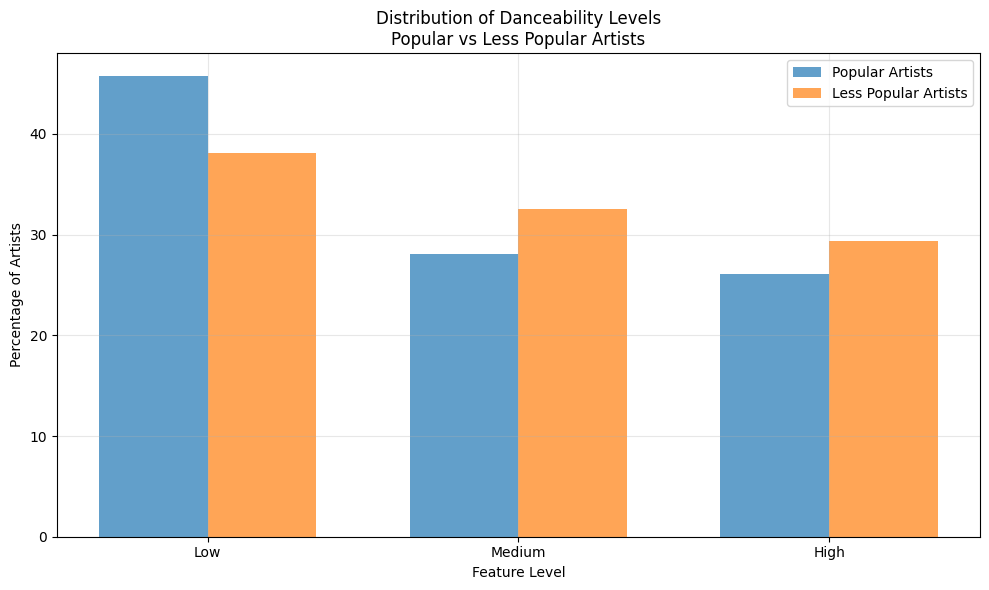

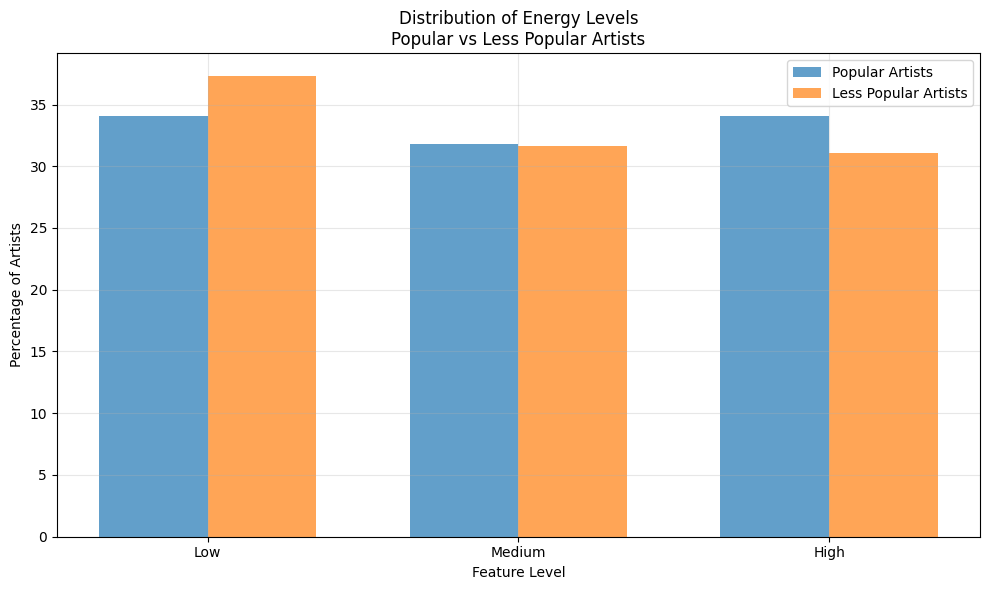

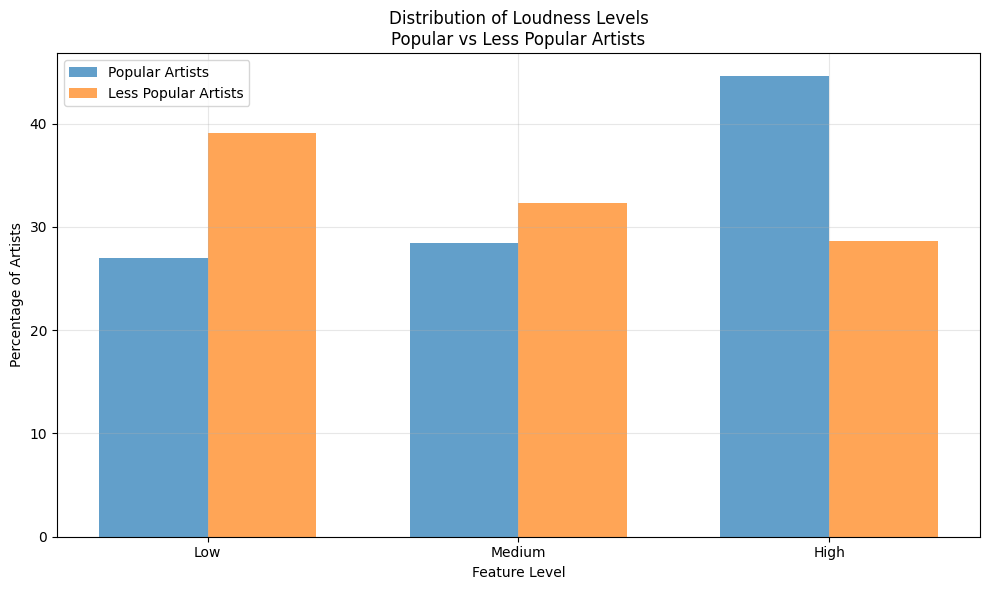

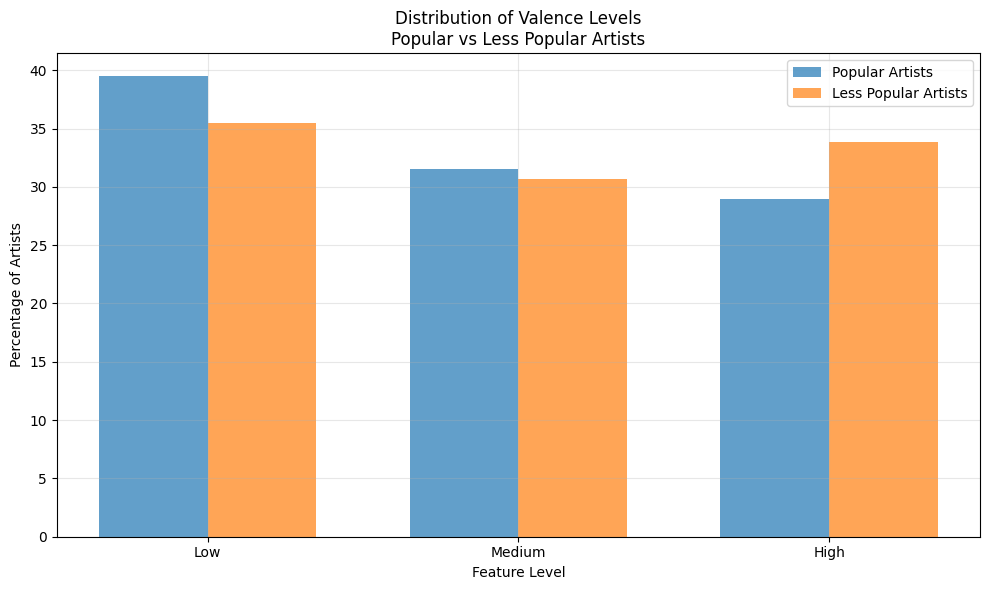

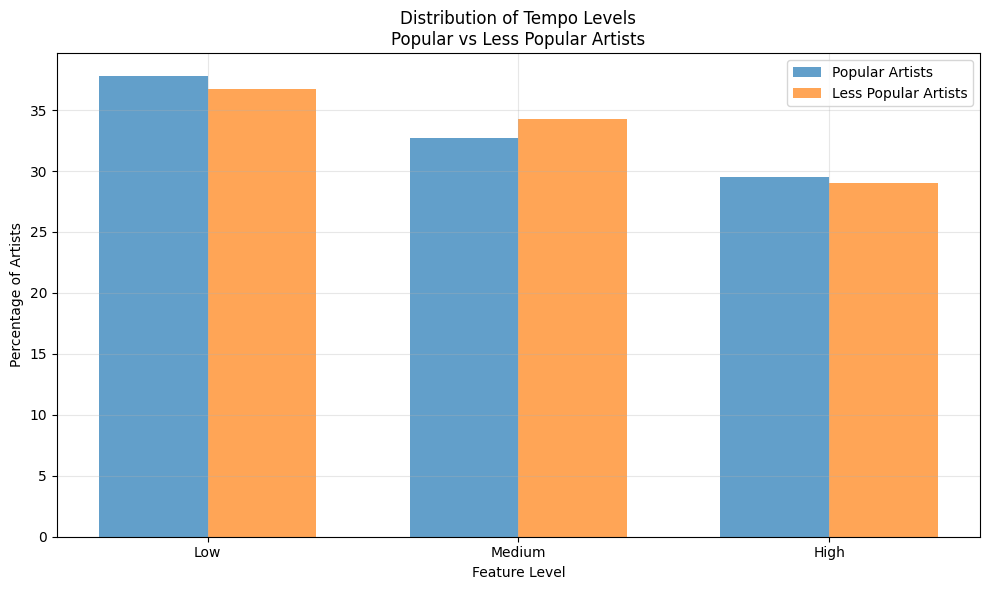

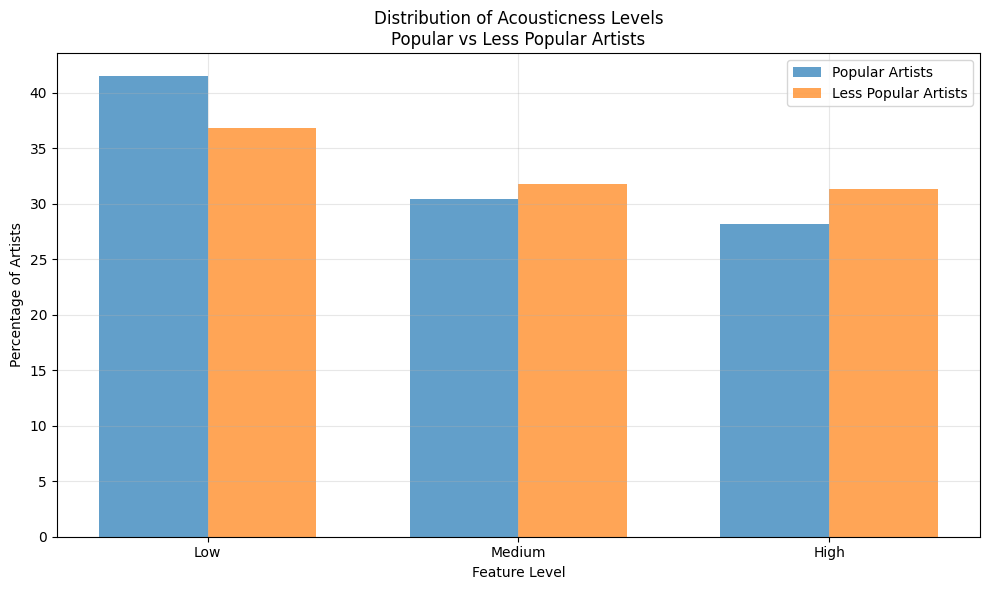

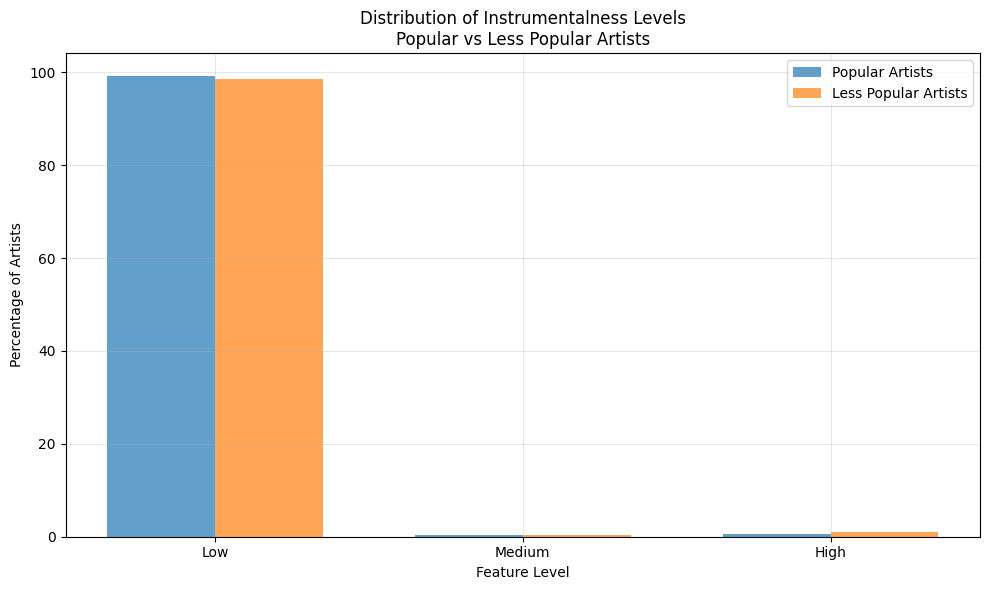


Characteristic Features of Popular Artists:

Danceability distribution for popular artists:
Low: 45.7%
Medium: 28.1%
High: 26.1%

Energy distribution for popular artists:
High: 34.1%
Low: 34.1%
Medium: 31.8%

Loudness distribution for popular artists:
High: 44.6%
Medium: 28.4%
Low: 27.0%

Valence distribution for popular artists:
Low: 39.5%
Medium: 31.5%
High: 29.0%

Tempo distribution for popular artists:
Low: 37.8%
Medium: 32.7%
High: 29.5%

Acousticness distribution for popular artists:
Low: 41.5%
Medium: 30.4%
High: 28.1%

Instrumentalness distribution for popular artists:
Low: 99.1%
High: 0.6%
Medium: 0.3%


In [22]:
# First, let's categorize artists as popular or not
popularity_threshold = 70

# Create categories for each feature
feature_columns = [
    'danceability', 'energy', 'loudness', 'valence', 
    'tempo', 'acousticness', 'instrumentalness'
]

# Function to categorize features into low, medium, high
def categorize_feature(series):
    try:
        return pd.qcut(series, q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')
    except ValueError:
        return pd.cut(series, bins=3, labels=['Low', 'Medium', 'High'])

# Create categories for each feature
for feature in feature_columns:
    top_spotify_songs[f'{feature}_category'] = categorize_feature(top_spotify_songs[feature])

# Group by artists and get mode of each feature category
artist_features = top_spotify_songs.groupby('artists').agg({
    'artist_popularity': 'mean',
    'songs': 'count'
}).reset_index()

# Function to get first mode (handle ties by taking the first one)
def get_first_mode(x):
    modes = x.mode()
    return modes.iloc[0] if not modes.empty else None

# Add mode for each feature category
for feature in feature_columns:
    feature_modes = top_spotify_songs.groupby('artists')[f'{feature}_category'].apply(get_first_mode).reset_index(drop=True)
    artist_features[f'{feature}_typical'] = feature_modes

# Split into popular and less popular artists
popular_artists = artist_features[artist_features['artist_popularity'] > popularity_threshold]
less_popular_artists = artist_features[artist_features['artist_popularity'] <= popularity_threshold]

# Plot distribution of feature categories for popular vs less popular artists
for feature in feature_columns:
    plt.figure(figsize=(10, 6))
    
    # Calculate percentages for popular artists
    pop_dist = popular_artists[f'{feature}_typical'].value_counts(normalize=True) * 100
    less_pop_dist = less_popular_artists[f'{feature}_typical'].value_counts(normalize=True) * 100
    
    # Create grouped bar plot
    x = np.arange(3)
    width = 0.35
    
    plt.bar(x - width/2, 
           [pop_dist.get('Low', 0), pop_dist.get('Medium', 0), pop_dist.get('High', 0)],
           width, label='Popular Artists', alpha=0.7)
    plt.bar(x + width/2, 
           [less_pop_dist.get('Low', 0), less_pop_dist.get('Medium', 0), less_pop_dist.get('High', 0)],
           width, label='Less Popular Artists', alpha=0.7)
    
    plt.title(f'Distribution of {feature.capitalize()} Levels\nPopular vs Less Popular Artists')
    plt.xlabel('Feature Level')
    plt.ylabel('Percentage of Artists')
    plt.xticks(x, ['Low', 'Medium', 'High'])
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Print summary statistics
print("\nCharacteristic Features of Popular Artists:")
for feature in feature_columns:
    print(f"\n{feature.capitalize()} distribution for popular artists:")
    dist = popular_artists[f'{feature}_typical'].value_counts(normalize=True) * 100
    for category, percentage in dist.items():
        print(f"{category}: {percentage:.1f}%")

## Chart Performance Analysis:
- Analyze the relationship between song features and chart performance
- Look at how long songs stay popular
- Compare features of songs that chart in different countries

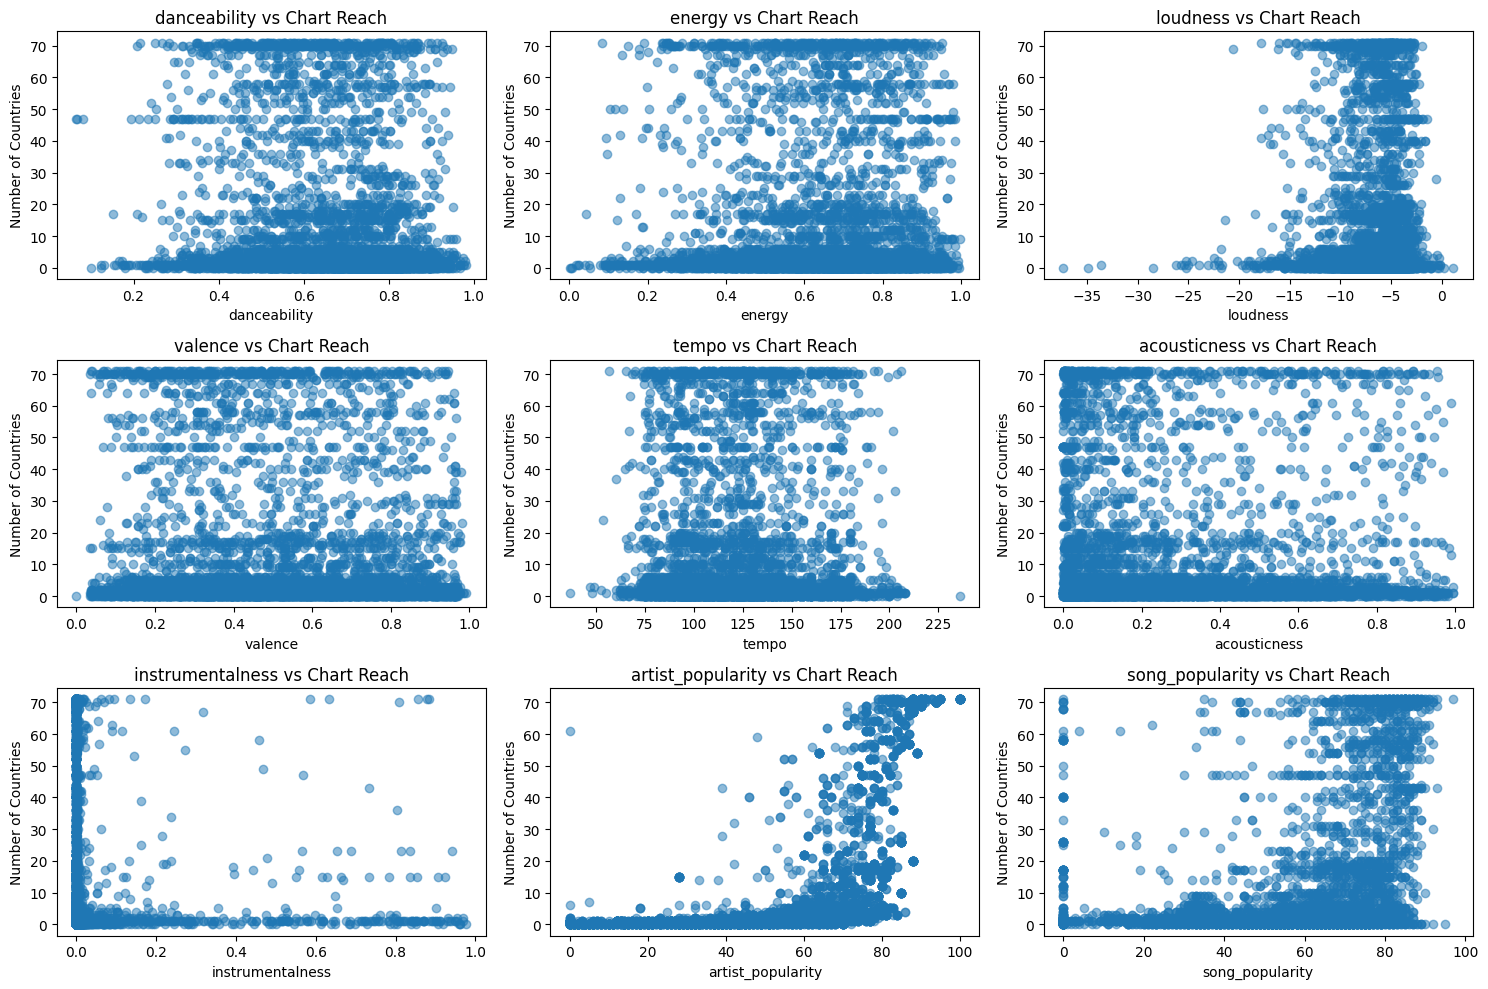

In [24]:
# Analyze chart hits by country
# First, let's parse the chart_hits column which contains country information
def extract_countries(chart_hits):
    if pd.isna(chart_hits):
        return []
    # Remove brackets and split by comma
    try:
        # Example format: "['us (5)', 'gb (6)', 'ar (1)']"
        hits = eval(chart_hits)
        return [hit.split()[0] for hit in hits]  # Get just the country codes
    except:
        return []

# Add country list to dataframe
top_spotify_songs['charting_countries'] = top_spotify_songs['chart_hits'].apply(extract_countries)

# Calculate number of countries each song charted in
top_spotify_songs['num_charting_countries'] = top_spotify_songs['charting_countries'].apply(len)

# Analyze relationship between features and number of countries charted
feature_columns = [
    'danceability', 'energy', 'loudness', 'valence', 
    'tempo', 'acousticness', 'instrumentalness',
    'artist_popularity', 'song_popularity'
]

# Create scatter plots for each feature vs number of charting countries
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(3, 3, i)
    plt.scatter(top_spotify_songs[feature], 
                top_spotify_songs['num_charting_countries'],
                alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Number of Countries')
    plt.title(f'{feature} vs Chart Reach')

plt.tight_layout()
plt.show()

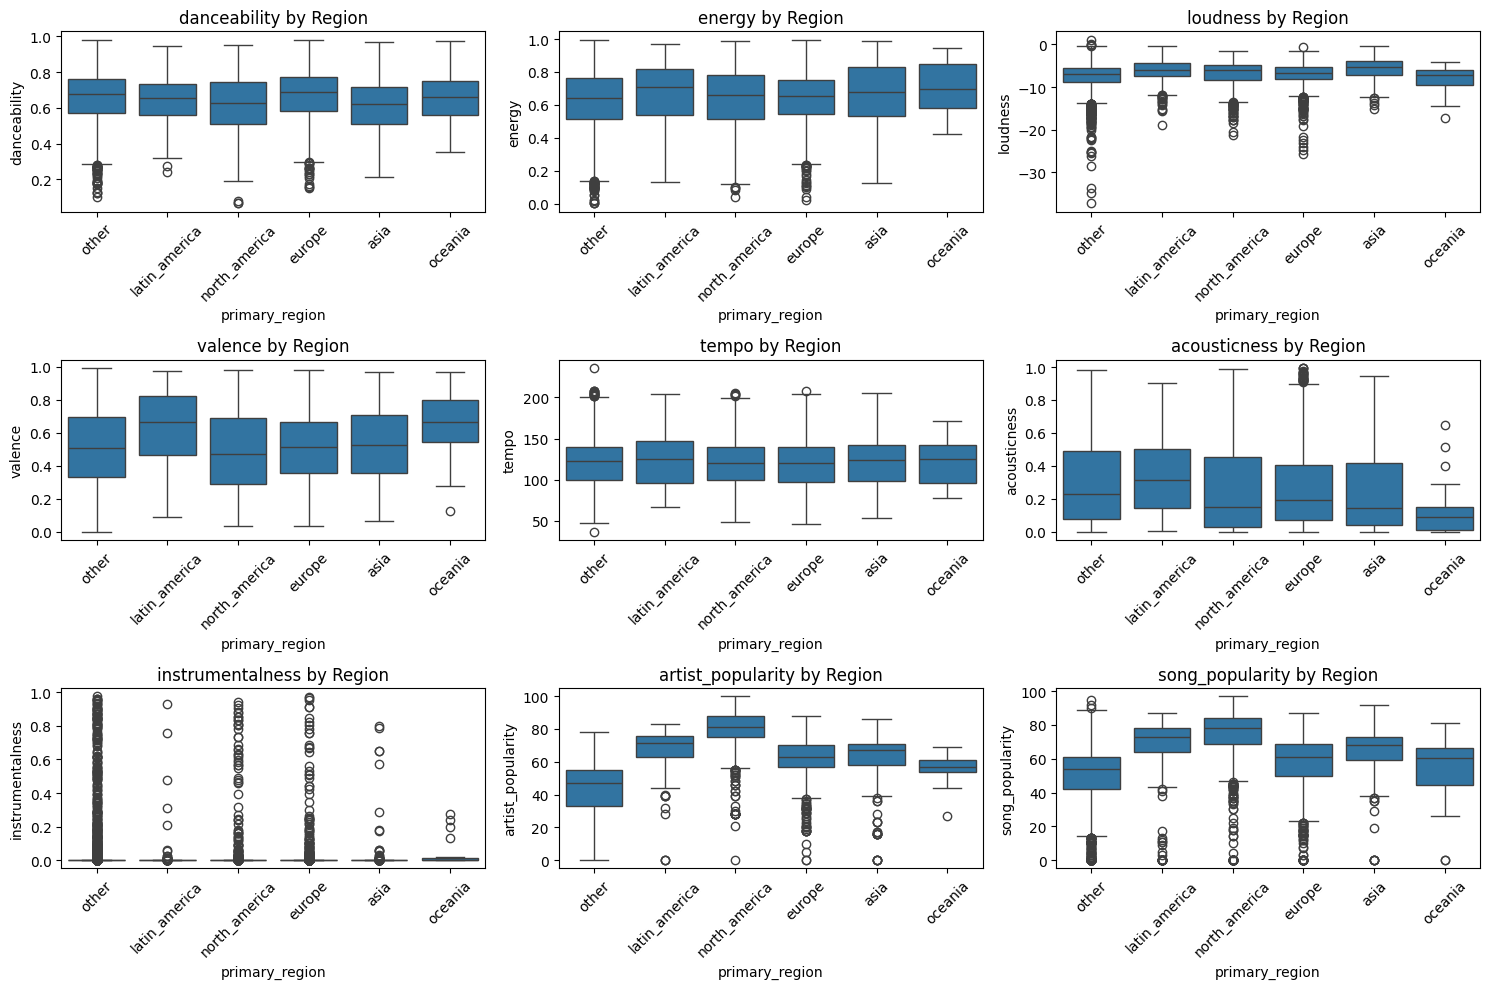


Average Feature Values by Region:
                danceability  energy  loudness  valence    tempo  \
primary_region                                                     
asia                   0.613   0.672    -5.802    0.523  122.773   
europe                 0.671   0.641    -7.004    0.513  120.962   
latin_america          0.643   0.676    -6.209    0.644  123.826   
north_america          0.620   0.637    -6.732    0.490  122.206   
oceania                0.646   0.715    -8.089    0.649  120.675   
other                  0.660   0.628    -7.453    0.519  122.809   

                acousticness  instrumentalness  artist_popularity  \
primary_region                                                      
asia                   0.260             0.010             63.671   
europe                 0.270             0.018             62.540   
latin_america          0.340             0.010             68.601   
north_america          0.264             0.023             80.040   
oceani

In [33]:
# Function to get primary region (e.g., Europe, North America, etc.)
def get_region(countries):
    regions = {
        'north_america': ['us', 'ca'],
        'europe': ['gb', 'de', 'fr', 'it', 'es', 'nl', 'se', 'no'],
        'asia': ['jp', 'kr', 'in', 'sg'],
        'oceania': ['au', 'nz'],
        'latin_america': ['br', 'mx', 'ar', 'co']
    }
    
    for region, region_countries in regions.items():
        if any(country in region_countries for country in countries):
            return region
    return 'other'

# Add region to dataframe
top_spotify_songs['primary_region'] = top_spotify_songs['charting_countries'].apply(get_region)

# Compare features across regions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=top_spotify_songs, x='primary_region', y=feature)
    plt.xticks(rotation=45)
    plt.title(f'{feature} by Region')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nAverage Feature Values by Region:")
print(top_spotify_songs.groupby('primary_region')[feature_columns].mean().round(3))

# Calculate success metrics by region
region_stats = top_spotify_songs.groupby('primary_region').agg({
    'song_popularity': 'mean',
    'songs': 'count',
    'num_charting_countries': 'mean'
}).round(2)

print("\nRegion Performance Metrics:")
print(region_stats)

## Release Date Strategy:
- Is there an optimal time to release songs?
- Do release dates affect popularity?

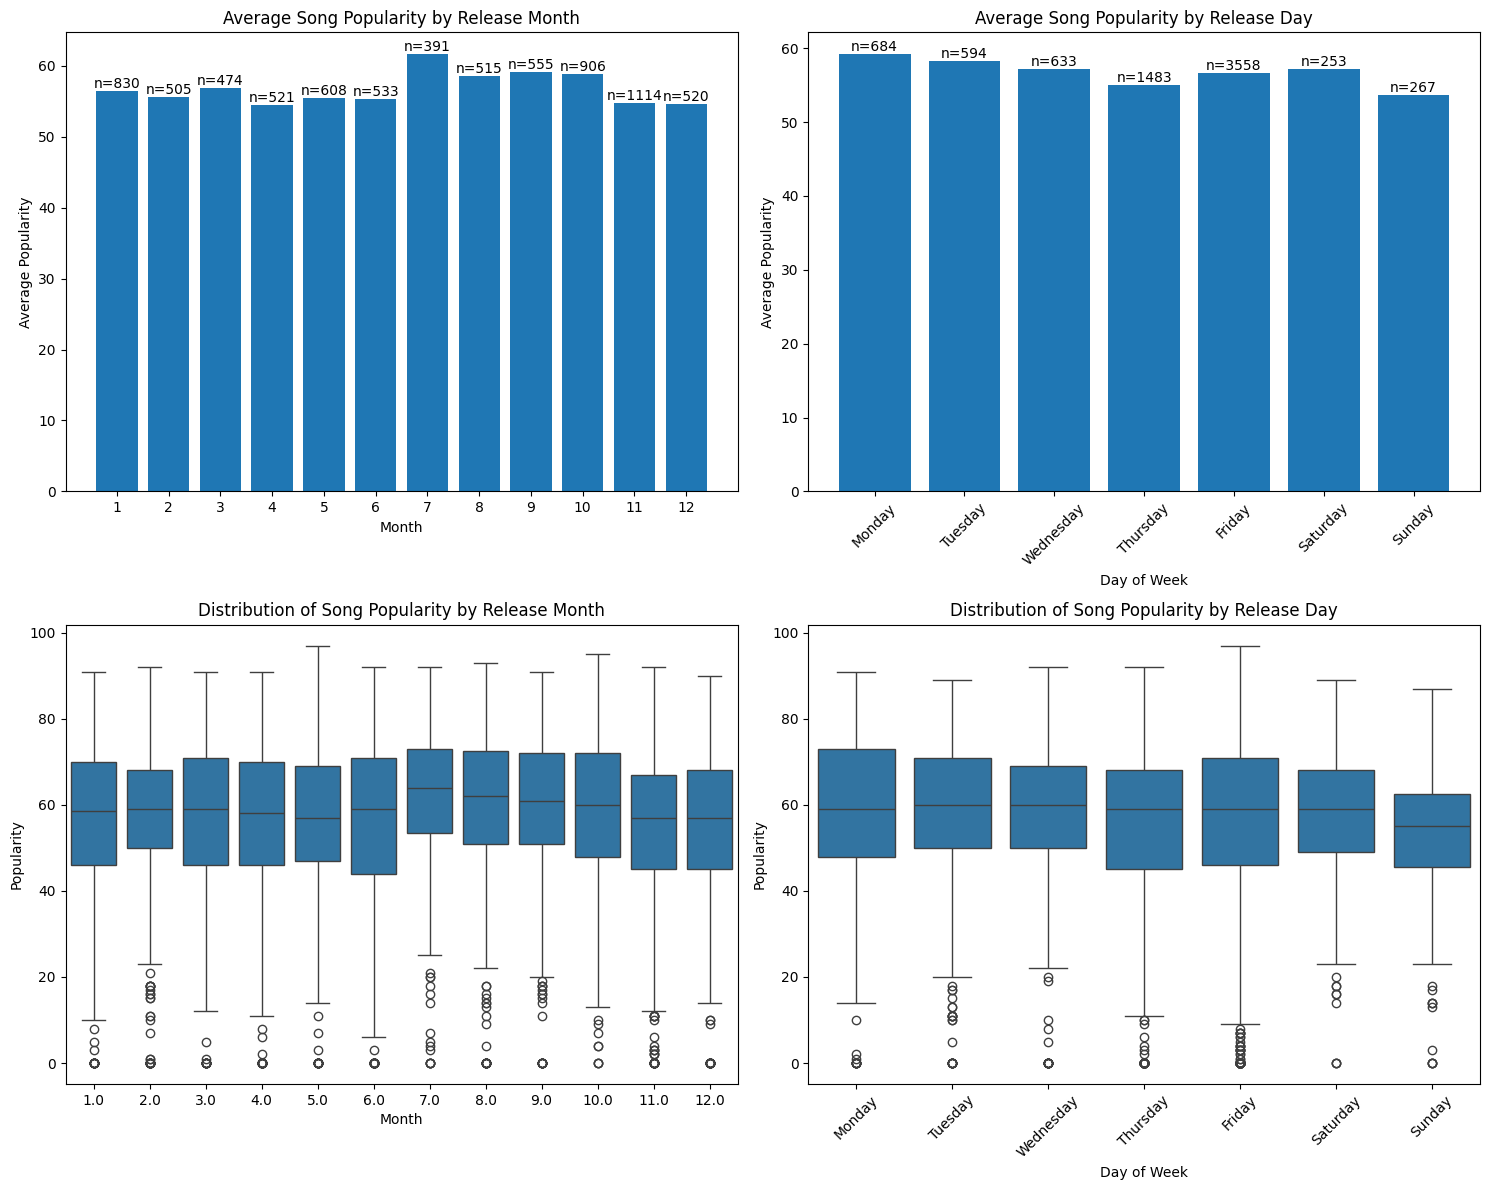


Statistical Summary:

Monthly Release Statistics:
              song_popularity              artist_popularity
                         mean    std count              mean
release_month                                               
1.0                     56.38  18.47   830             52.92
2.0                     55.63  20.12   505             51.67
3.0                     56.88  19.39   474             53.11
4.0                     54.47  21.77   521             55.82
5.0                     55.46  19.49   608             56.76
6.0                     55.28  21.70   533             53.86
7.0                     61.64  17.05   391             56.95
8.0                     58.56  19.38   515             57.29
9.0                     59.19  17.81   555             52.26
10.0                    58.82  17.30   906             55.64
11.0                    54.79  18.29  1114             54.25
12.0                    54.66  19.35   520             55.69

Day of Week Release Statistics:
 

In [34]:
# Convert album_release_date to datetime
top_spotify_songs['album_release_date'] = pd.to_datetime(top_spotify_songs['album_release_date'])

# Extract month and day of week from release date
top_spotify_songs['release_month'] = top_spotify_songs['album_release_date'].dt.month
top_spotify_songs['release_day_of_week'] = top_spotify_songs['album_release_date'].dt.day_name()

# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Average popularity by release month
monthly_avg = top_spotify_songs.groupby('release_month')['song_popularity'].mean()
monthly_count = top_spotify_songs.groupby('release_month').size()

ax1.bar(monthly_avg.index, monthly_avg.values)
ax1.set_title('Average Song Popularity by Release Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Popularity')
ax1.set_xticks(range(1, 13))

# Add count as text on top of bars
for i, (avg, count) in enumerate(zip(monthly_avg, monthly_count)):
    ax1.text(i+1, avg, f'n={count}', ha='center', va='bottom')

# 2. Average popularity by day of week
daily_avg = top_spotify_songs.groupby('release_day_of_week')['song_popularity'].mean()
daily_count = top_spotify_songs.groupby('release_day_of_week').size()

# Sort by days of week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = daily_avg.reindex(days_order)
daily_count = daily_count.reindex(days_order)

ax2.bar(daily_avg.index, daily_avg.values)
ax2.set_title('Average Song Popularity by Release Day')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Average Popularity')
ax2.tick_params(axis='x', rotation=45)

# Add count as text on top of bars
for i, (avg, count) in enumerate(zip(daily_avg, daily_count)):
    ax2.text(i, avg, f'n={count}', ha='center', va='bottom')

# 3. Distribution of popularity scores by month
sns.boxplot(data=top_spotify_songs, x='release_month', y='song_popularity', ax=ax3)
ax3.set_title('Distribution of Song Popularity by Release Month')
ax3.set_xlabel('Month')
ax3.set_ylabel('Popularity')

# 4. Distribution of popularity scores by day of week
sns.boxplot(data=top_spotify_songs, x='release_day_of_week', y='song_popularity', ax=ax4, order=days_order)
ax4.set_title('Distribution of Song Popularity by Release Day')
ax4.set_xlabel('Day of Week')
ax4.set_ylabel('Popularity')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Statistical Analysis
print("\nStatistical Summary:")

# Monthly analysis
monthly_stats = top_spotify_songs.groupby('release_month').agg({
    'song_popularity': ['mean', 'std', 'count'],
    'artist_popularity': 'mean'
}).round(2)
print("\nMonthly Release Statistics:")
print(monthly_stats)

# Day of week analysis
daily_stats = top_spotify_songs.groupby('release_day_of_week').agg({
    'song_popularity': ['mean', 'std', 'count'],
    'artist_popularity': 'mean'
}).round(2)
print("\nDay of Week Release Statistics:")
print(daily_stats)

# Find best performing release times
print("\nBest Performing Release Times:")
print(f"Month with highest average popularity: {monthly_avg.idxmax()} (Avg: {monthly_avg.max():.2f})")
print(f"Day with highest average popularity: {daily_avg.idxmax()} (Avg: {daily_avg.max():.2f})")

## Feature Combinations:
- Are certain combinations of features (like high energy + high danceability) more successful?
- What feature combinations are rare but successful?


Error categorizing instrumentalness: Bin labels must be one fewer than the number of bin edges


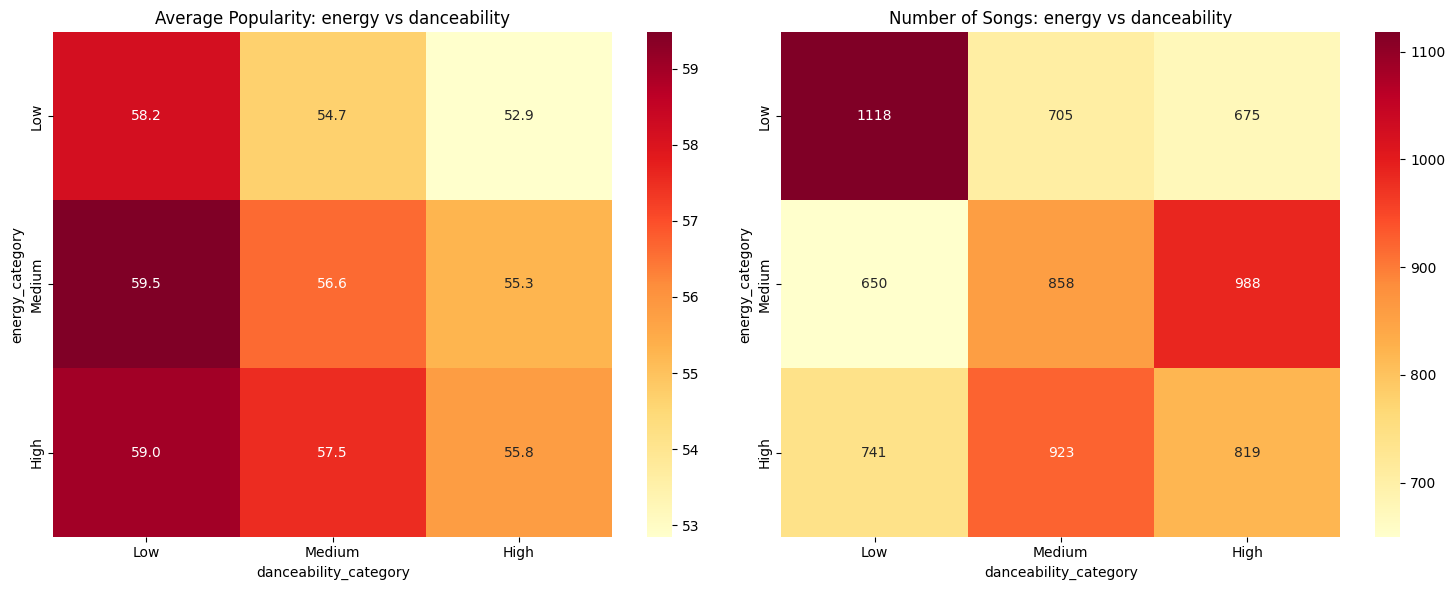


Top combinations of energy and danceability:
                                      song_popularity      
                                                 mean count
energy_category danceability_category                      
Medium          Low                             59.48   650
High            Low                             58.99   741
Low             Low                             58.17  1118
High            Medium                          57.52   923
Medium          Medium                          56.62   858

Rare but successful combinations of energy and danceability:
                                      song_popularity      
                                                 mean count
energy_category danceability_category                      
Medium          Low                             59.48   650




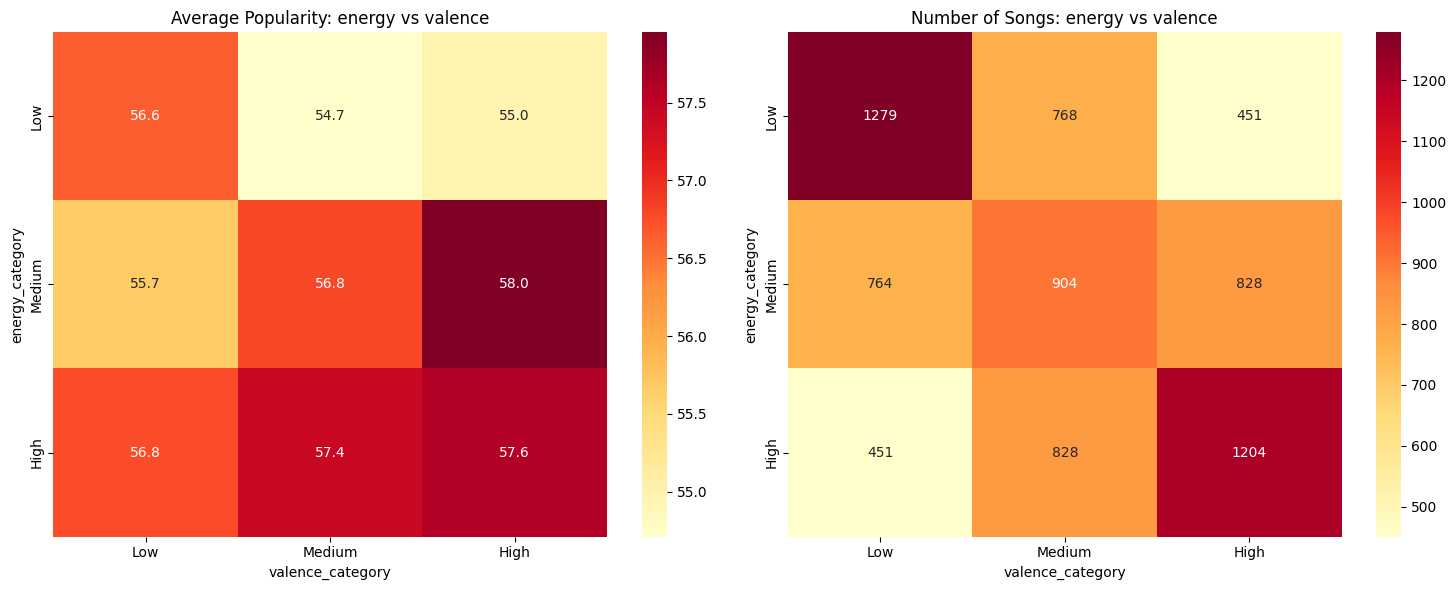


Top combinations of energy and valence:
                                 song_popularity      
                                            mean count
energy_category valence_category                      
Medium          High                       57.95   828
High            High                       57.62  1204
                Medium                     57.42   828
Medium          Medium                     56.78   904
High            Low                        56.75   451




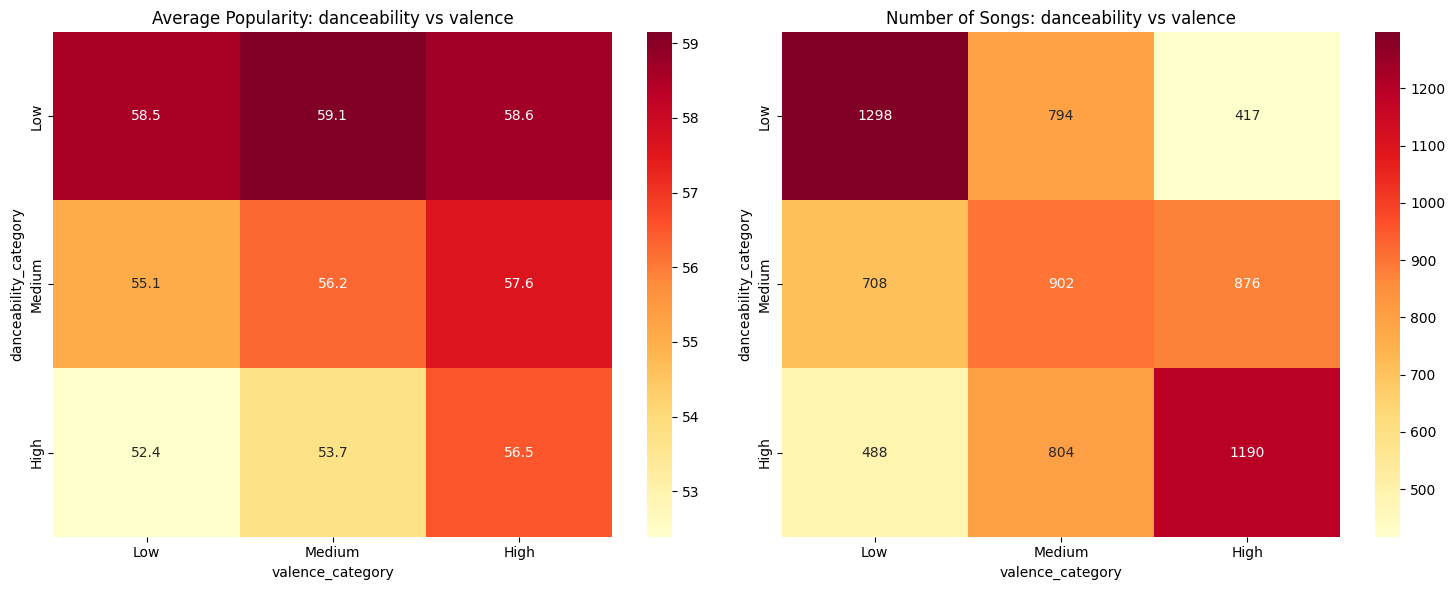


Top combinations of danceability and valence:
                                       song_popularity      
                                                  mean count
danceability_category valence_category                      
Low                   Medium                     59.14   794
                      High                       58.65   417
                      Low                        58.54  1298
Medium                High                       57.62   876
High                  High                       56.49  1190

Rare but successful combinations of danceability and valence:
                                       song_popularity      
                                                  mean count
danceability_category valence_category                      
Low                   High                       58.65   417




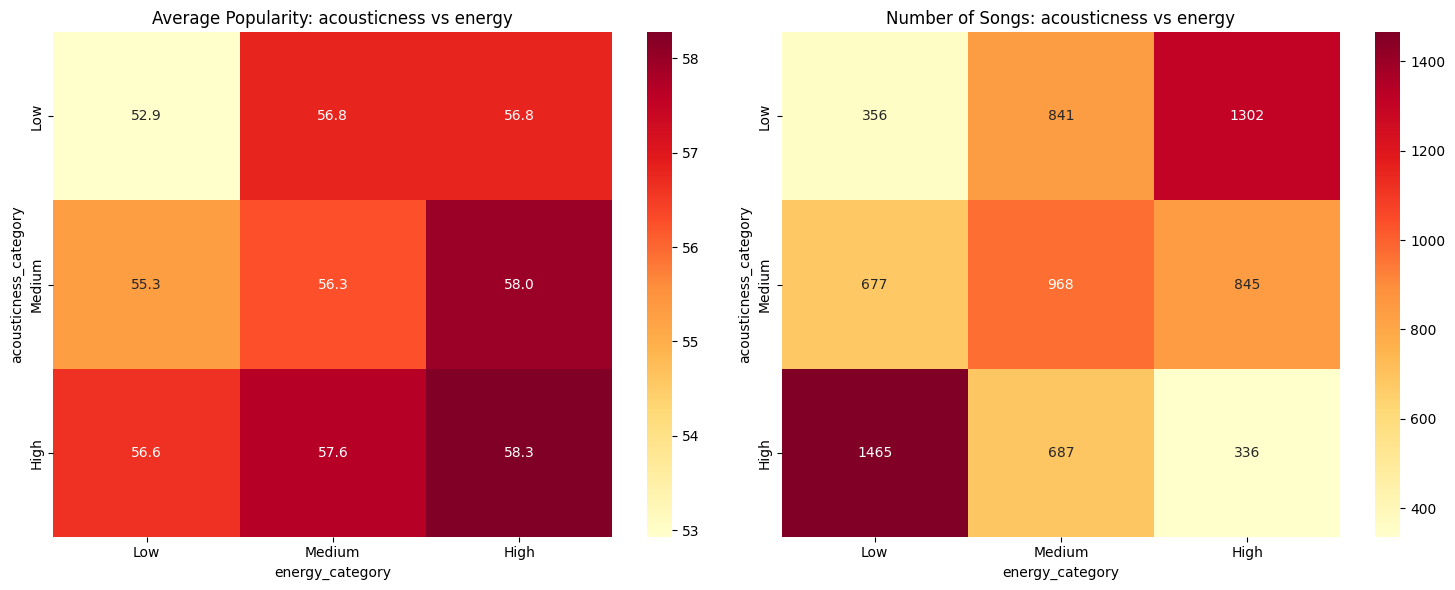


Top combinations of acousticness and energy:
                                      song_popularity      
                                                 mean count
acousticness_category energy_category                      
High                  High                      58.27   336
Medium                High                      57.97   845
High                  Medium                    57.65   687
Low                   Medium                    56.80   841
                      High                      56.79  1302

Rare but successful combinations of acousticness and energy:
                                      song_popularity      
                                                 mean count
acousticness_category energy_category                      
High                  High                      58.27   336




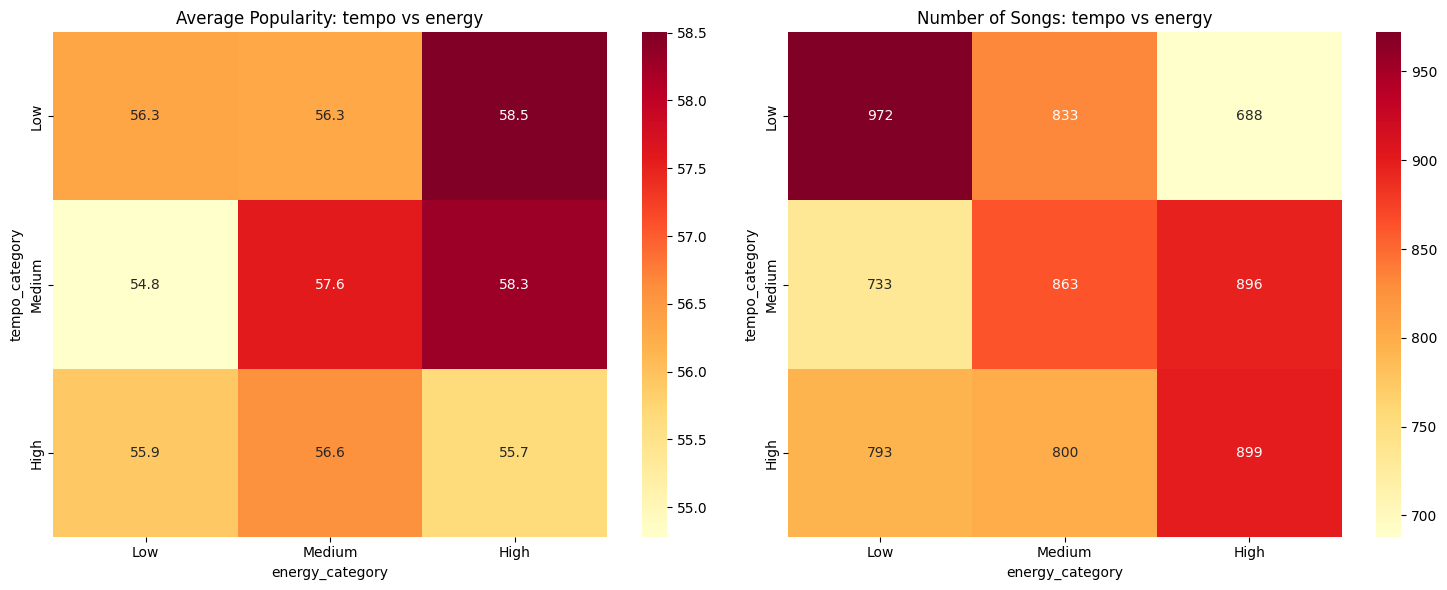


Top combinations of tempo and energy:
                               song_popularity      
                                          mean count
tempo_category energy_category                      
Low            High                      58.50   688
Medium         High                      58.28   896
               Medium                    57.57   863
High           Medium                    56.57   800
Low            Low                       56.34   972

Rare but successful combinations of tempo and energy:
                               song_popularity      
                                          mean count
tempo_category energy_category                      
Low            High                       58.5   688



Most successful three-way combinations:
                                                       song_popularity      
                                                                  mean count
energy_category danceability_category valence_category                   

In [38]:
# First, let's categorize features into Low/Medium/High
features_to_combine = [
    'danceability', 'energy', 'valence', 'tempo', 
    'acousticness', 'instrumentalness'
]

# Create categories for each feature
for feature in features_to_combine:
    try:
        top_spotify_songs[f'{feature}_category'] = pd.qcut(
            top_spotify_songs[feature], 
            q=3, 
            labels=['Low', 'Medium', 'High'],
            duplicates='drop'
        )
    except ValueError as e:
        print(f"Error categorizing {feature}: {e}")

# Let's look at pairs of features first
# We'll focus on some interesting combinations
feature_pairs = [
    ('energy', 'danceability'),
    ('energy', 'valence'),
    ('danceability', 'valence'),
    ('acousticness', 'energy'),
    ('tempo', 'energy')
]

# Create visualizations for each pair
for feature1, feature2 in feature_pairs:
    # Create a pivot table of average popularity for each combination
    pivot = pd.pivot_table(
        top_spotify_songs,
        values='song_popularity',
        index=f'{feature1}_category',
        columns=f'{feature2}_category',
        aggfunc=['mean', 'count'],
        observed=False  # Retain current behavior to avoid FutureWarning
    )
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot average popularity heatmap
    sns.heatmap(pivot['mean'], annot=True, fmt='.1f', ax=ax1, cmap='YlOrRd')
    ax1.set_title(f'Average Popularity: {feature1} vs {feature2}')
    
    # Plot count heatmap (to identify rare combinations)
    sns.heatmap(pivot['count'], annot=True, fmt='d', ax=ax2, cmap='YlOrRd')
    ax2.set_title(f'Number of Songs: {feature1} vs {feature2}')
    
    plt.tight_layout()
    plt.show()
    
    # Print the most successful combinations
    print(f"\nTop combinations of {feature1} and {feature2}:")
    combinations = top_spotify_songs.groupby(
        [f'{feature1}_category', f'{feature2}_category'],
        observed=False  # Retain current behavior to avoid FutureWarning
    ).agg({
        'song_popularity': ['mean', 'count']
    }).round(2)
    
    combinations = combinations.sort_values(('song_popularity', 'mean'), ascending=False)
    print(combinations.head())
    
    # Identify rare but successful combinations
    # Define rare as bottom 25% by count but top 25% by popularity
    count_threshold = combinations[('song_popularity', 'count')].quantile(0.25)
    popularity_threshold = combinations[('song_popularity', 'mean')].quantile(0.75)
    
    rare_successful = combinations[
        (combinations[('song_popularity', 'count')] <= count_threshold) &
        (combinations[('song_popularity', 'mean')] >= popularity_threshold)
    ]
    
    if not rare_successful.empty:
        print(f"\nRare but successful combinations of {feature1} and {feature2}:")
        print(rare_successful)
    print("\n" + "="*50 + "\n")

# Let's also look at three-way combinations for the most interesting features
features_three = ['energy', 'danceability', 'valence']

# Create a pivot table for three-way combinations
three_way = top_spotify_songs.groupby(
    [f'{f}_category' for f in features_three],
    observed=False  # Retain current behavior to avoid FutureWarning
).agg({
    'song_popularity': ['mean', 'count']
}).round(2)

# Sort by popularity
print("\nMost successful three-way combinations:")
print(three_way.sort_values(('song_popularity', 'mean'), ascending=False).head(10))

# Identify rare but successful three-way combinations
count_threshold = three_way[('song_popularity', 'count')].quantile(0.25)
popularity_threshold = three_way[('song_popularity', 'mean')].quantile(0.75)

rare_successful_three = three_way[
    (three_way[('song_popularity', 'count')] <= count_threshold) &
    (three_way[('song_popularity', 'mean')] >= popularity_threshold)
]

print("\nRare but successful three-way combinations:")
print(rare_successful_three)

## Do artists with more songs have more popular songs?


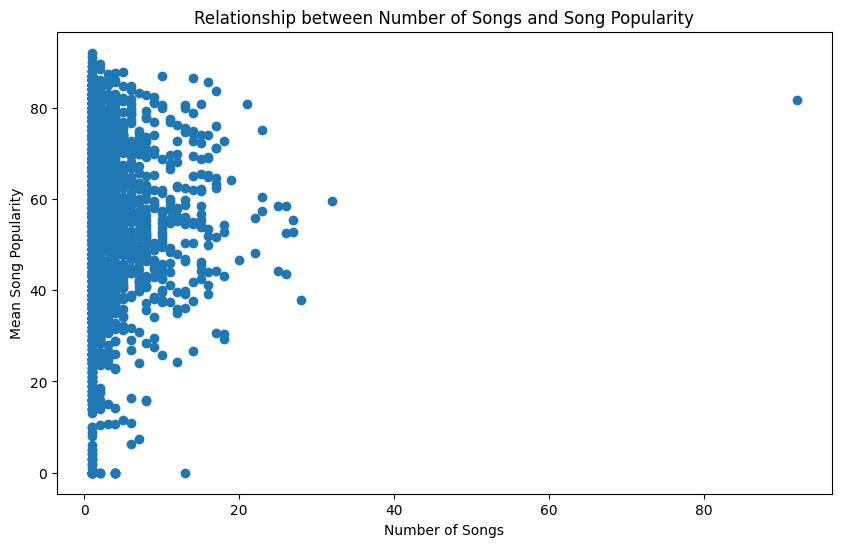

In [17]:
# Group by artists and calculate mean song popularity
artist_popularity = top_spotify_songs.groupby('artists').agg({
    'song_popularity': 'mean',
    'songs': 'count'  # This will give us the number of songs per artist
}).reset_index()

# Plot relationship between number of songs and song popularity
plt.figure(figsize=(10, 6))
plt.scatter(artist_popularity['songs'], artist_popularity['song_popularity'])
plt.xlabel('Number of Songs')
plt.ylabel('Mean Song Popularity')
plt.title('Relationship between Number of Songs and Song Popularity')
plt.show()